# DNN: analysis with Keras of 2D data

Group 14:
- Gloria Isotton   ID: 2072705
- Sara Munafò      ID: 2072380
- Maryam Feizi     ID: 2091504
- Carlo Divari     ID: 1186975

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib as mpl
mpl.rc('image', cmap='copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15

%run nonlinear_function.py

# training data
perc_train = 0.8

2023-03-10 13:39:28.523053: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-10 13:39:28.624292: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-10 13:39:28.624306: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-10 13:39:29.039076: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 1.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 1.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 1.0
[30.98125525 37.21759137] 1.0
[46.46475974 22.36853469] 1.0
[14.24753279 21.74536208] 0.0
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

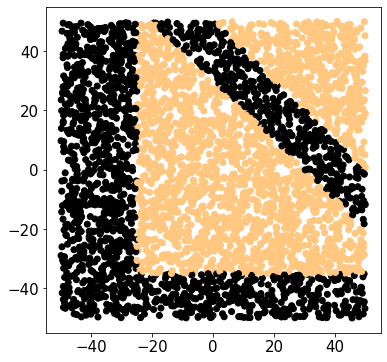

In [2]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

### Split training and test data

In [3]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


### Rescale input data

In [4]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

### Define the model with Keras / Tensorflow + Optimization method and cost function

In [11]:
# reproducibility
np.random.seed(12345)
import tensorflow.random as tf_r
tf_r.set_seed(12345)


def create_model(activation='relu',optimizer=keras.optimizers.Adam()):   #defined a function so it's easier to tune 
    model = Sequential()                                                 #activation and optimizer as parameters
    model.add(Dense(L,input_shape=(L,),activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,           #optimization method and cost function
                  metrics=['accuracy'])
    return model
    

In [12]:
model_DNN = create_model()

print(model_DNN.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 2)                 6         
                                                                 
 dense_6 (Dense)             (None, 20)                60        
                                                                 
 dense_7 (Dense)             (None, 20)                420       
                                                                 
 dense_8 (Dense)             (None, 20)                420       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 927
Trainable params: 927
Non-trainable 

### Training

In [13]:
fit = model_DNN.fit(x_train, y_train,
               epochs = 400, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.6802 - accuracy: 0.5800 - val_loss: 0.6582 - val_accuracy: 0.5987 - 547ms/epoch - 9ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6381 - accuracy: 0.6672 - val_loss: 0.5985 - val_accuracy: 0.6762 - 119ms/epoch - 2ms/step
Epoch 3/400
64/64 - 0s - loss: 0.5896 - accuracy: 0.6922 - val_loss: 0.5680 - val_accuracy: 0.7262 - 87ms/epoch - 1ms/step
Epoch 4/400
64/64 - 0s - loss: 0.5486 - accuracy: 0.7353 - val_loss: 0.5223 - val_accuracy: 0.7575 - 64ms/epoch - 1ms/step
Epoch 5/400
64/64 - 0s - loss: 0.5081 - accuracy: 0.7731 - val_loss: 0.4945 - val_accuracy: 0.7788 - 60ms/epoch - 942us/step
Epoch 6/400
64/64 - 0s - loss: 0.4847 - accuracy: 0.7878 - val_loss: 0.4803 - val_accuracy: 0.8037 - 69ms/epoch - 1ms/step
Epoch 7/400
64/64 - 0s - loss: 0.4642 - accuracy: 0.8009 - val_loss: 0.4556 - val_accuracy: 0.8238 - 63ms/epoch - 986us/step
Epoch 8/400
64/64 - 0s - loss: 0.4437 - accuracy: 0.8122 - val_loss: 0.4368 - val_accuracy: 0.8263 - 76ms/epoch - 1ms/step
Epoch 9/40

Epoch 67/400
64/64 - 0s - loss: 0.1247 - accuracy: 0.9544 - val_loss: 0.1035 - val_accuracy: 0.9625 - 69ms/epoch - 1ms/step
Epoch 68/400
64/64 - 0s - loss: 0.1155 - accuracy: 0.9619 - val_loss: 0.1017 - val_accuracy: 0.9737 - 67ms/epoch - 1ms/step
Epoch 69/400
64/64 - 0s - loss: 0.1200 - accuracy: 0.9588 - val_loss: 0.1173 - val_accuracy: 0.9613 - 64ms/epoch - 999us/step
Epoch 70/400
64/64 - 0s - loss: 0.1198 - accuracy: 0.9606 - val_loss: 0.1119 - val_accuracy: 0.9563 - 65ms/epoch - 1ms/step
Epoch 71/400
64/64 - 0s - loss: 0.1147 - accuracy: 0.9622 - val_loss: 0.0960 - val_accuracy: 0.9787 - 65ms/epoch - 1ms/step
Epoch 72/400
64/64 - 0s - loss: 0.1170 - accuracy: 0.9600 - val_loss: 0.1050 - val_accuracy: 0.9600 - 69ms/epoch - 1ms/step
Epoch 73/400
64/64 - 0s - loss: 0.1161 - accuracy: 0.9569 - val_loss: 0.1077 - val_accuracy: 0.9688 - 63ms/epoch - 982us/step
Epoch 74/400
64/64 - 0s - loss: 0.1073 - accuracy: 0.9631 - val_loss: 0.0917 - val_accuracy: 0.9775 - 67ms/epoch - 1ms/step
Epoc

Epoch 133/400
64/64 - 0s - loss: 0.0728 - accuracy: 0.9762 - val_loss: 0.0697 - val_accuracy: 0.9712 - 68ms/epoch - 1ms/step
Epoch 134/400
64/64 - 0s - loss: 0.0754 - accuracy: 0.9722 - val_loss: 0.0636 - val_accuracy: 0.9800 - 69ms/epoch - 1ms/step
Epoch 135/400
64/64 - 0s - loss: 0.0685 - accuracy: 0.9753 - val_loss: 0.0617 - val_accuracy: 0.9812 - 69ms/epoch - 1ms/step
Epoch 136/400
64/64 - 0s - loss: 0.0734 - accuracy: 0.9728 - val_loss: 0.0548 - val_accuracy: 0.9825 - 69ms/epoch - 1ms/step
Epoch 137/400
64/64 - 0s - loss: 0.0758 - accuracy: 0.9716 - val_loss: 0.0713 - val_accuracy: 0.9700 - 73ms/epoch - 1ms/step
Epoch 138/400
64/64 - 0s - loss: 0.0738 - accuracy: 0.9716 - val_loss: 0.0522 - val_accuracy: 0.9850 - 73ms/epoch - 1ms/step
Epoch 139/400
64/64 - 0s - loss: 0.0711 - accuracy: 0.9741 - val_loss: 0.0546 - val_accuracy: 0.9862 - 67ms/epoch - 1ms/step
Epoch 140/400
64/64 - 0s - loss: 0.0631 - accuracy: 0.9800 - val_loss: 0.0584 - val_accuracy: 0.9787 - 71ms/epoch - 1ms/step


Epoch 199/400
64/64 - 0s - loss: 0.0530 - accuracy: 0.9825 - val_loss: 0.0438 - val_accuracy: 0.9825 - 69ms/epoch - 1ms/step
Epoch 200/400
64/64 - 0s - loss: 0.0541 - accuracy: 0.9794 - val_loss: 0.0455 - val_accuracy: 0.9837 - 70ms/epoch - 1ms/step
Epoch 201/400
64/64 - 0s - loss: 0.0529 - accuracy: 0.9784 - val_loss: 0.0409 - val_accuracy: 0.9875 - 68ms/epoch - 1ms/step
Epoch 202/400
64/64 - 0s - loss: 0.0542 - accuracy: 0.9794 - val_loss: 0.0664 - val_accuracy: 0.9663 - 68ms/epoch - 1ms/step
Epoch 203/400
64/64 - 0s - loss: 0.0544 - accuracy: 0.9791 - val_loss: 0.0546 - val_accuracy: 0.9737 - 69ms/epoch - 1ms/step
Epoch 204/400
64/64 - 0s - loss: 0.0671 - accuracy: 0.9737 - val_loss: 0.0372 - val_accuracy: 0.9887 - 71ms/epoch - 1ms/step
Epoch 205/400
64/64 - 0s - loss: 0.0563 - accuracy: 0.9797 - val_loss: 0.0446 - val_accuracy: 0.9812 - 68ms/epoch - 1ms/step
Epoch 206/400
64/64 - 0s - loss: 0.0578 - accuracy: 0.9766 - val_loss: 0.0483 - val_accuracy: 0.9837 - 66ms/epoch - 1ms/step


Epoch 265/400
64/64 - 0s - loss: 0.0588 - accuracy: 0.9753 - val_loss: 0.0449 - val_accuracy: 0.9800 - 66ms/epoch - 1ms/step
Epoch 266/400
64/64 - 0s - loss: 0.0512 - accuracy: 0.9781 - val_loss: 0.0356 - val_accuracy: 0.9862 - 69ms/epoch - 1ms/step
Epoch 267/400
64/64 - 0s - loss: 0.0433 - accuracy: 0.9853 - val_loss: 0.0552 - val_accuracy: 0.9775 - 72ms/epoch - 1ms/step
Epoch 268/400
64/64 - 0s - loss: 0.0440 - accuracy: 0.9862 - val_loss: 0.0363 - val_accuracy: 0.9900 - 70ms/epoch - 1ms/step
Epoch 269/400
64/64 - 0s - loss: 0.0476 - accuracy: 0.9828 - val_loss: 0.0366 - val_accuracy: 0.9862 - 67ms/epoch - 1ms/step
Epoch 270/400
64/64 - 0s - loss: 0.0403 - accuracy: 0.9856 - val_loss: 0.0477 - val_accuracy: 0.9837 - 71ms/epoch - 1ms/step
Epoch 271/400
64/64 - 0s - loss: 0.0474 - accuracy: 0.9806 - val_loss: 0.0749 - val_accuracy: 0.9650 - 73ms/epoch - 1ms/step
Epoch 272/400
64/64 - 0s - loss: 0.0474 - accuracy: 0.9803 - val_loss: 0.0339 - val_accuracy: 0.9875 - 69ms/epoch - 1ms/step


Epoch 331/400
64/64 - 0s - loss: 0.0395 - accuracy: 0.9850 - val_loss: 0.0473 - val_accuracy: 0.9762 - 70ms/epoch - 1ms/step
Epoch 332/400
64/64 - 0s - loss: 0.0640 - accuracy: 0.9737 - val_loss: 0.0444 - val_accuracy: 0.9812 - 71ms/epoch - 1ms/step
Epoch 333/400
64/64 - 0s - loss: 0.0334 - accuracy: 0.9903 - val_loss: 0.0428 - val_accuracy: 0.9837 - 67ms/epoch - 1ms/step
Epoch 334/400
64/64 - 0s - loss: 0.0389 - accuracy: 0.9850 - val_loss: 0.0323 - val_accuracy: 0.9862 - 71ms/epoch - 1ms/step
Epoch 335/400
64/64 - 0s - loss: 0.0437 - accuracy: 0.9822 - val_loss: 0.0271 - val_accuracy: 0.9887 - 65ms/epoch - 1ms/step
Epoch 336/400
64/64 - 0s - loss: 0.0373 - accuracy: 0.9862 - val_loss: 0.0480 - val_accuracy: 0.9712 - 71ms/epoch - 1ms/step
Epoch 337/400
64/64 - 0s - loss: 0.0395 - accuracy: 0.9850 - val_loss: 0.0375 - val_accuracy: 0.9825 - 71ms/epoch - 1ms/step
Epoch 338/400
64/64 - 0s - loss: 0.0437 - accuracy: 0.9816 - val_loss: 0.0525 - val_accuracy: 0.9750 - 68ms/epoch - 1ms/step


Epoch 397/400
64/64 - 0s - loss: 0.0447 - accuracy: 0.9800 - val_loss: 0.0754 - val_accuracy: 0.9725 - 79ms/epoch - 1ms/step
Epoch 398/400
64/64 - 0s - loss: 0.0513 - accuracy: 0.9800 - val_loss: 0.0288 - val_accuracy: 0.9862 - 67ms/epoch - 1ms/step
Epoch 399/400
64/64 - 0s - loss: 0.0368 - accuracy: 0.9844 - val_loss: 0.0302 - val_accuracy: 0.9887 - 71ms/epoch - 1ms/step
Epoch 400/400
64/64 - 0s - loss: 0.0405 - accuracy: 0.9797 - val_loss: 0.0443 - val_accuracy: 0.9825 - 71ms/epoch - 1ms/step


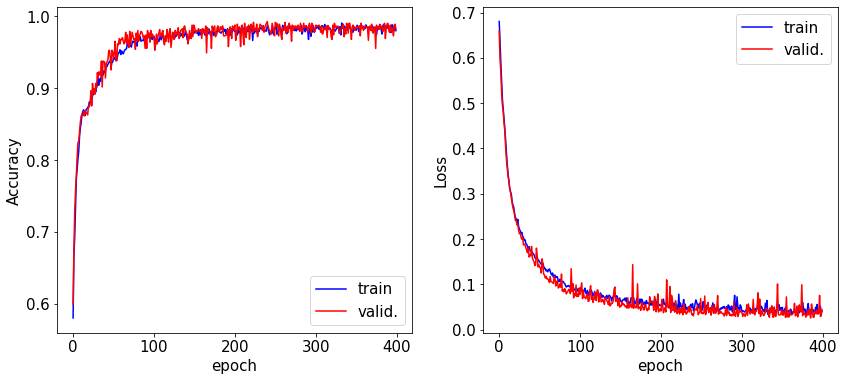

In [14]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [15]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model_DNN.predict(grid_r)

51 2601
[50. 50.]
82/82 [==============================] - 0s 618us/step


<function matplotlib.pyplot.show(close=None, block=None)>

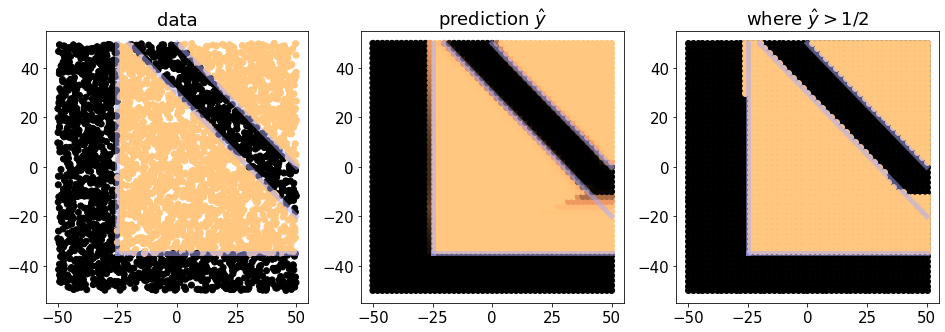

In [16]:
def boundaries():  
    x1=-25
    y1=-35
    c="#AAAAFF"
    a=0.5
    lw=5
    ax.plot((50,-20),(-20,50),c=c,alpha=a,lw=lw)
    ax.plot((50,0),(0,50),c=c,alpha=a,lw=lw)
    ax.plot((x1,50),(y1,y1),c=c,alpha=a,lw=lw)
    ax.plot((x1,x1),(y1,50),c=c,alpha=a,lw=lw)
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax.set_title("data")
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax.set_title("prediction $\\hat y$")
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
boundaries()
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show

## Optimization

Grid search to find the best minimization algorithm:

In [17]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
    
    
# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=create_model, 
                        epochs=1, 
                        batch_size=50, 
                        verbose=1)

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# define parameter dictionary
param_grid = dict(optimizer=optimizer)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result_opt = grid.fit(x_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result_opt.best_score_, grid_result_opt.best_params_))
means = grid_result_opt.cv_results_['mean_test_score']
stds = grid_result_opt.cv_results_['std_test_score']
params = grid_result_opt.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/tmp/ipykernel_264103/3411211519.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_gridsearch = KerasClassifier(build_fn=create_model,


64/64 [==============================] - 1s 762us/step - loss: 0.6559 - accuracy: 0.6753
Best: 0.651875 using {'optimizer': 'Nadam'}
0.558125 (0.060972) with: {'optimizer': 'SGD'}
0.628125 (0.064314) with: {'optimizer': 'RMSprop'}
0.454375 (0.047224) with: {'optimizer': 'Adagrad'}
0.520000 (0.017875) with: {'optimizer': 'Adadelta'}
0.597187 (0.065356) with: {'optimizer': 'Adam'}
0.619375 (0.022526) with: {'optimizer': 'Adamax'}
0.651875 (0.016117) with: {'optimizer': 'Nadam'}


Grid search to find the best activation function:

In [18]:
model = create_model()
model.compile()
model_activation = KerasClassifier(build_fn=create_model, epochs=1, batch_size=50, verbose=1)


activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)

grid = GridSearchCV(estimator=model_activation, param_grid=param_grid, n_jobs=1, cv=3)
grid_result_act = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result_act.best_score_, grid_result_act.best_params_))
means = grid_result_act.cv_results_['mean_test_score']
stds = grid_result_act.cv_results_['std_test_score']
params = grid_result_act.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/tmp/ipykernel_264103/3280631067.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_activation = KerasClassifier(build_fn=create_model, epochs=1, batch_size=50, verbose=1)


64/64 [==============================] - 0s 768us/step - loss: 0.6124 - accuracy: 0.6791
Best: 0.714694 using {'activation': 'softsign'}
0.517495 (0.013583) with: {'activation': 'softmax'}
0.580912 (0.101725) with: {'activation': 'softplus'}
0.714694 (0.014728) with: {'activation': 'softsign'}
0.711550 (0.044691) with: {'activation': 'relu'}
0.688445 (0.026671) with: {'activation': 'tanh'}
0.517495 (0.013583) with: {'activation': 'sigmoid'}
0.517495 (0.013583) with: {'activation': 'hard_sigmoid'}
0.658766 (0.036419) with: {'activation': 'linear'}


## Exercise 2 - Best DNN 

After performing a grid search, we consider the best minimization algorithm and the best activation function and we train the model again.

In [19]:
#extract the best optimizer algorithm and activation unit from the previous grid search
opt = list(grid_result_opt.best_params_.values())
best_act = list(grid_result_act.best_params_.values())
best_act = best_act[0]

In [20]:
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
if opt[0]=='SGD':
    best_opt = keras.optimizers.SGD()
if opt[0]=='RMSprop':
    best_opt = keras.optimizers.RMSprop()
if opt[0]=='Adagrad':
    best_opt = keras.optimizers.Adagrad()           #updating the best optimizer previously found
if opt[0]=='Adadelta':
    best_opt = keras.optimizers.Adadelta()
if opt[0]=='Adam':
    best_opt = keras.optimizers.Adam()
if opt[0]=='Adamax':
    best_opt = keras.optimizers.Adamax()
if opt[0]=='Nadam':
    best_opt = keras.optimizers.Nadam()

def best_model(activation=best_act,optimizer=best_opt):
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation=best_act))
    model.add(Dense(20,activation=best_act))
    model.add(Dense(20,activation=best_act))
    model.add(Dense(20,activation=best_act))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
    model.compile(loss='binary_crossentropy',
                  optimizer=best_opt,           #optimization method and cost function
                  metrics=['accuracy'])
    return model

In [21]:
best_model_DNN = best_model()
print(best_model_DNN.summary())

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_285 (Dense)           (None, 2)                 6         
                                                                 
 dense_286 (Dense)           (None, 20)                60        
                                                                 
 dense_287 (Dense)           (None, 20)                420       
                                                                 
 dense_288 (Dense)           (None, 20)                420       
                                                                 
 dropout_57 (Dropout)        (None, 20)                0         
                                                                 
 dense_289 (Dense)           (None, 1)                 21        
                                                                 
Total params: 927
Trainable params: 927
Non-trainable

In [22]:
fit = best_model_DNN.fit(x_train, y_train,
               epochs = 400, batch_size = 50,
               validation_data=(x_valid,y_valid),    #fit the best model with same amount of data
               verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.6660 - accuracy: 0.6553 - val_loss: 0.6305 - val_accuracy: 0.7100 - 608ms/epoch - 9ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6027 - accuracy: 0.7163 - val_loss: 0.5883 - val_accuracy: 0.7025 - 71ms/epoch - 1ms/step
Epoch 3/400
64/64 - 0s - loss: 0.5756 - accuracy: 0.7119 - val_loss: 0.5743 - val_accuracy: 0.7375 - 99ms/epoch - 2ms/step
Epoch 4/400
64/64 - 0s - loss: 0.5580 - accuracy: 0.7366 - val_loss: 0.5528 - val_accuracy: 0.7400 - 73ms/epoch - 1ms/step
Epoch 5/400
64/64 - 0s - loss: 0.5394 - accuracy: 0.7434 - val_loss: 0.5325 - val_accuracy: 0.7513 - 74ms/epoch - 1ms/step
Epoch 6/400
64/64 - 0s - loss: 0.5235 - accuracy: 0.7538 - val_loss: 0.5182 - val_accuracy: 0.7613 - 71ms/epoch - 1ms/step
Epoch 7/400
64/64 - 0s - loss: 0.5091 - accuracy: 0.7716 - val_loss: 0.5004 - val_accuracy: 0.7850 - 62ms/epoch - 962us/step
Epoch 8/400
64/64 - 0s - loss: 0.4935 - accuracy: 0.7884 - val_loss: 0.4866 - val_accuracy: 0.8125 - 63ms/epoch - 985us/step
Epoch 9/400

Epoch 67/400
64/64 - 0s - loss: 0.2860 - accuracy: 0.8631 - val_loss: 0.2896 - val_accuracy: 0.8625 - 65ms/epoch - 1ms/step
Epoch 68/400
64/64 - 0s - loss: 0.2863 - accuracy: 0.8606 - val_loss: 0.2938 - val_accuracy: 0.8612 - 61ms/epoch - 954us/step
Epoch 69/400
64/64 - 0s - loss: 0.2851 - accuracy: 0.8609 - val_loss: 0.2943 - val_accuracy: 0.8600 - 65ms/epoch - 1ms/step
Epoch 70/400
64/64 - 0s - loss: 0.2848 - accuracy: 0.8622 - val_loss: 0.2868 - val_accuracy: 0.8637 - 55ms/epoch - 863us/step
Epoch 71/400
64/64 - 0s - loss: 0.2845 - accuracy: 0.8637 - val_loss: 0.2856 - val_accuracy: 0.8625 - 55ms/epoch - 859us/step
Epoch 72/400
64/64 - 0s - loss: 0.2812 - accuracy: 0.8641 - val_loss: 0.2848 - val_accuracy: 0.8600 - 55ms/epoch - 862us/step
Epoch 73/400
64/64 - 0s - loss: 0.2805 - accuracy: 0.8619 - val_loss: 0.2851 - val_accuracy: 0.8637 - 54ms/epoch - 845us/step
Epoch 74/400
64/64 - 0s - loss: 0.2812 - accuracy: 0.8619 - val_loss: 0.2818 - val_accuracy: 0.8612 - 54ms/epoch - 845us/s

Epoch 132/400
64/64 - 0s - loss: 0.1379 - accuracy: 0.9481 - val_loss: 0.1258 - val_accuracy: 0.9588 - 75ms/epoch - 1ms/step
Epoch 133/400
64/64 - 0s - loss: 0.1319 - accuracy: 0.9544 - val_loss: 0.1276 - val_accuracy: 0.9525 - 64ms/epoch - 1ms/step
Epoch 134/400
64/64 - 0s - loss: 0.1313 - accuracy: 0.9547 - val_loss: 0.1253 - val_accuracy: 0.9600 - 72ms/epoch - 1ms/step
Epoch 135/400
64/64 - 0s - loss: 0.1312 - accuracy: 0.9528 - val_loss: 0.1237 - val_accuracy: 0.9575 - 77ms/epoch - 1ms/step
Epoch 136/400
64/64 - 0s - loss: 0.1316 - accuracy: 0.9497 - val_loss: 0.1198 - val_accuracy: 0.9663 - 73ms/epoch - 1ms/step
Epoch 137/400
64/64 - 0s - loss: 0.1303 - accuracy: 0.9513 - val_loss: 0.1257 - val_accuracy: 0.9588 - 63ms/epoch - 987us/step
Epoch 138/400
64/64 - 0s - loss: 0.1295 - accuracy: 0.9509 - val_loss: 0.1196 - val_accuracy: 0.9563 - 53ms/epoch - 831us/step
Epoch 139/400
64/64 - 0s - loss: 0.1258 - accuracy: 0.9544 - val_loss: 0.1251 - val_accuracy: 0.9475 - 61ms/epoch - 953us

Epoch 198/400
64/64 - 0s - loss: 0.0832 - accuracy: 0.9734 - val_loss: 0.0774 - val_accuracy: 0.9812 - 69ms/epoch - 1ms/step
Epoch 199/400
64/64 - 0s - loss: 0.0802 - accuracy: 0.9709 - val_loss: 0.0804 - val_accuracy: 0.9725 - 72ms/epoch - 1ms/step
Epoch 200/400
64/64 - 0s - loss: 0.0829 - accuracy: 0.9741 - val_loss: 0.0791 - val_accuracy: 0.9837 - 73ms/epoch - 1ms/step
Epoch 201/400
64/64 - 0s - loss: 0.0825 - accuracy: 0.9706 - val_loss: 0.0767 - val_accuracy: 0.9787 - 71ms/epoch - 1ms/step
Epoch 202/400
64/64 - 0s - loss: 0.0827 - accuracy: 0.9712 - val_loss: 0.0759 - val_accuracy: 0.9800 - 74ms/epoch - 1ms/step
Epoch 203/400
64/64 - 0s - loss: 0.0797 - accuracy: 0.9731 - val_loss: 0.0842 - val_accuracy: 0.9700 - 63ms/epoch - 988us/step
Epoch 204/400
64/64 - 0s - loss: 0.0803 - accuracy: 0.9719 - val_loss: 0.0758 - val_accuracy: 0.9762 - 62ms/epoch - 969us/step
Epoch 205/400
64/64 - 0s - loss: 0.0800 - accuracy: 0.9734 - val_loss: 0.0746 - val_accuracy: 0.9775 - 61ms/epoch - 950us

Epoch 264/400
64/64 - 0s - loss: 0.0572 - accuracy: 0.9784 - val_loss: 0.0592 - val_accuracy: 0.9787 - 75ms/epoch - 1ms/step
Epoch 265/400
64/64 - 0s - loss: 0.0581 - accuracy: 0.9794 - val_loss: 0.0534 - val_accuracy: 0.9837 - 75ms/epoch - 1ms/step
Epoch 266/400
64/64 - 0s - loss: 0.0555 - accuracy: 0.9806 - val_loss: 0.0518 - val_accuracy: 0.9862 - 74ms/epoch - 1ms/step
Epoch 267/400
64/64 - 0s - loss: 0.0557 - accuracy: 0.9816 - val_loss: 0.0563 - val_accuracy: 0.9800 - 78ms/epoch - 1ms/step
Epoch 268/400
64/64 - 0s - loss: 0.0535 - accuracy: 0.9787 - val_loss: 0.0597 - val_accuracy: 0.9800 - 73ms/epoch - 1ms/step
Epoch 269/400
64/64 - 0s - loss: 0.0571 - accuracy: 0.9787 - val_loss: 0.0558 - val_accuracy: 0.9812 - 73ms/epoch - 1ms/step
Epoch 270/400
64/64 - 0s - loss: 0.0533 - accuracy: 0.9797 - val_loss: 0.0496 - val_accuracy: 0.9837 - 71ms/epoch - 1ms/step
Epoch 271/400
64/64 - 0s - loss: 0.0590 - accuracy: 0.9775 - val_loss: 0.0494 - val_accuracy: 0.9850 - 72ms/epoch - 1ms/step


Epoch 330/400
64/64 - 0s - loss: 0.0465 - accuracy: 0.9819 - val_loss: 0.0364 - val_accuracy: 0.9900 - 78ms/epoch - 1ms/step
Epoch 331/400
64/64 - 0s - loss: 0.0398 - accuracy: 0.9878 - val_loss: 0.0379 - val_accuracy: 0.9887 - 77ms/epoch - 1ms/step
Epoch 332/400
64/64 - 0s - loss: 0.0458 - accuracy: 0.9787 - val_loss: 0.0378 - val_accuracy: 0.9862 - 73ms/epoch - 1ms/step
Epoch 333/400
64/64 - 0s - loss: 0.0420 - accuracy: 0.9844 - val_loss: 0.0437 - val_accuracy: 0.9850 - 77ms/epoch - 1ms/step
Epoch 334/400
64/64 - 0s - loss: 0.0420 - accuracy: 0.9837 - val_loss: 0.0376 - val_accuracy: 0.9912 - 80ms/epoch - 1ms/step
Epoch 335/400
64/64 - 0s - loss: 0.0434 - accuracy: 0.9837 - val_loss: 0.0401 - val_accuracy: 0.9850 - 71ms/epoch - 1ms/step
Epoch 336/400
64/64 - 0s - loss: 0.0416 - accuracy: 0.9834 - val_loss: 0.0618 - val_accuracy: 0.9712 - 72ms/epoch - 1ms/step
Epoch 337/400
64/64 - 0s - loss: 0.0467 - accuracy: 0.9806 - val_loss: 0.0367 - val_accuracy: 0.9912 - 74ms/epoch - 1ms/step


Epoch 396/400
64/64 - 0s - loss: 0.0353 - accuracy: 0.9881 - val_loss: 0.0334 - val_accuracy: 0.9900 - 80ms/epoch - 1ms/step
Epoch 397/400
64/64 - 0s - loss: 0.0349 - accuracy: 0.9856 - val_loss: 0.0380 - val_accuracy: 0.9850 - 87ms/epoch - 1ms/step
Epoch 398/400
64/64 - 0s - loss: 0.0359 - accuracy: 0.9856 - val_loss: 0.0349 - val_accuracy: 0.9925 - 72ms/epoch - 1ms/step
Epoch 399/400
64/64 - 0s - loss: 0.0344 - accuracy: 0.9881 - val_loss: 0.0332 - val_accuracy: 0.9887 - 68ms/epoch - 1ms/step
Epoch 400/400
64/64 - 0s - loss: 0.0351 - accuracy: 0.9869 - val_loss: 0.0296 - val_accuracy: 0.9937 - 78ms/epoch - 1ms/step


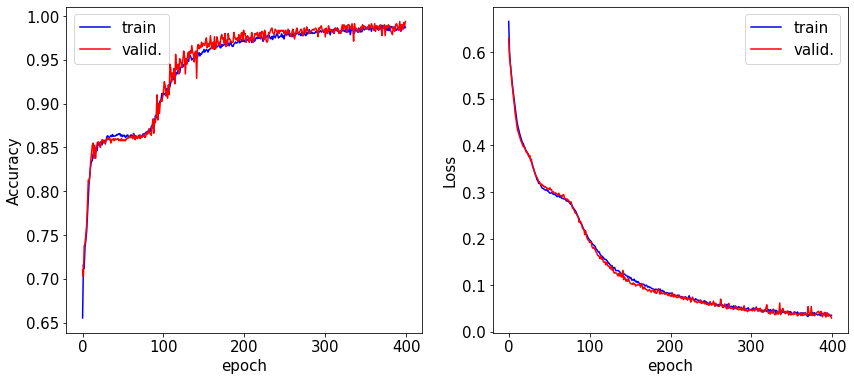

In [23]:
#plot loss and accuracy vs epoch number
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

Given the best DNN, we study how its performance changes when the number N of samples is reduced, augmented and increased.

## P 2.A Reduced data

We make a try considering the 50 % of the original data. The new reduced dataset is divided into train (80%) and validation set and  the data are rescaled.
The data are then trained using the best Neural Network from previous point and the resulting loss and accuracy are shown in the figures below.

In [24]:
Nr = 2000 #Nr is the nuber of data samples we consider for the reduced dataset
Nr_train = int(perc_train*Nr)
xr_train = x[0:Nr_train]
yr_train = y[0:Nr_train]
xr_valid = x[Nr_train:Nr]
yr_valid = y[Nr_train:Nr]

print("Train:",len(xr_train),"\t Validation:",len(xr_valid))

#rescale data
xr_train = Rescale(xr_train)
xr_valid = Rescale(xr_valid)

Train: 1600 	 Validation: 400


<function matplotlib.pyplot.show(close=None, block=None)>

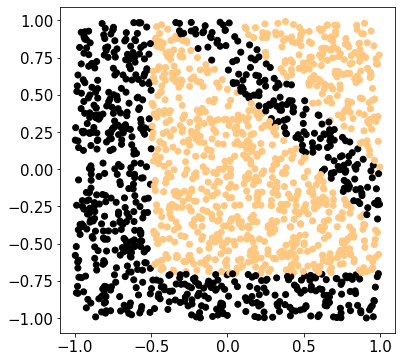

In [25]:
plt.figure(figsize = (6,6))
plt.scatter(xr_train[:,0],xr_train[:,1],c=yr_train)
plt.show

In [26]:
best_model_DNN = best_model()
fit = best_model_DNN.fit(xr_train, yr_train,
               epochs = 400, batch_size = 50,
               validation_data=(xr_valid,yr_valid),    
               verbose=2)

Epoch 1/400
32/32 - 1s - loss: 0.6126 - accuracy: 0.6900 - val_loss: 0.6019 - val_accuracy: 0.6800 - 752ms/epoch - 24ms/step
Epoch 2/400
32/32 - 0s - loss: 0.5796 - accuracy: 0.7156 - val_loss: 0.5867 - val_accuracy: 0.7200 - 41ms/epoch - 1ms/step
Epoch 3/400
32/32 - 0s - loss: 0.5569 - accuracy: 0.7356 - val_loss: 0.5747 - val_accuracy: 0.7225 - 70ms/epoch - 2ms/step
Epoch 4/400
32/32 - 0s - loss: 0.5415 - accuracy: 0.7412 - val_loss: 0.5500 - val_accuracy: 0.7300 - 58ms/epoch - 2ms/step
Epoch 5/400
32/32 - 0s - loss: 0.5269 - accuracy: 0.7462 - val_loss: 0.5586 - val_accuracy: 0.7275 - 48ms/epoch - 1ms/step
Epoch 6/400
32/32 - 0s - loss: 0.5203 - accuracy: 0.7487 - val_loss: 0.5340 - val_accuracy: 0.7425 - 67ms/epoch - 2ms/step
Epoch 7/400
32/32 - 0s - loss: 0.5123 - accuracy: 0.7538 - val_loss: 0.5281 - val_accuracy: 0.7375 - 36ms/epoch - 1ms/step
Epoch 8/400
32/32 - 0s - loss: 0.5061 - accuracy: 0.7525 - val_loss: 0.5264 - val_accuracy: 0.7525 - 57ms/epoch - 2ms/step
Epoch 9/400
32

Epoch 68/400
32/32 - 0s - loss: 0.3684 - accuracy: 0.8669 - val_loss: 0.3901 - val_accuracy: 0.8450 - 35ms/epoch - 1ms/step
Epoch 69/400
32/32 - 0s - loss: 0.3643 - accuracy: 0.8662 - val_loss: 0.3974 - val_accuracy: 0.8450 - 34ms/epoch - 1ms/step
Epoch 70/400
32/32 - 0s - loss: 0.3675 - accuracy: 0.8694 - val_loss: 0.3888 - val_accuracy: 0.8525 - 33ms/epoch - 1ms/step
Epoch 71/400
32/32 - 0s - loss: 0.3679 - accuracy: 0.8637 - val_loss: 0.3873 - val_accuracy: 0.8475 - 34ms/epoch - 1ms/step
Epoch 72/400
32/32 - 0s - loss: 0.3651 - accuracy: 0.8687 - val_loss: 0.3865 - val_accuracy: 0.8425 - 34ms/epoch - 1ms/step
Epoch 73/400
32/32 - 0s - loss: 0.3630 - accuracy: 0.8656 - val_loss: 0.3848 - val_accuracy: 0.8500 - 34ms/epoch - 1ms/step
Epoch 74/400
32/32 - 0s - loss: 0.3661 - accuracy: 0.8644 - val_loss: 0.3864 - val_accuracy: 0.8475 - 35ms/epoch - 1ms/step
Epoch 75/400
32/32 - 0s - loss: 0.3619 - accuracy: 0.8662 - val_loss: 0.3875 - val_accuracy: 0.8450 - 35ms/epoch - 1ms/step
Epoch 76

Epoch 134/400
32/32 - 0s - loss: 0.2788 - accuracy: 0.8594 - val_loss: 0.2985 - val_accuracy: 0.8450 - 35ms/epoch - 1ms/step
Epoch 135/400
32/32 - 0s - loss: 0.2732 - accuracy: 0.8619 - val_loss: 0.3042 - val_accuracy: 0.8525 - 35ms/epoch - 1ms/step
Epoch 136/400
32/32 - 0s - loss: 0.2754 - accuracy: 0.8675 - val_loss: 0.2978 - val_accuracy: 0.8500 - 48ms/epoch - 1ms/step
Epoch 137/400
32/32 - 0s - loss: 0.2750 - accuracy: 0.8631 - val_loss: 0.3011 - val_accuracy: 0.8500 - 52ms/epoch - 2ms/step
Epoch 138/400
32/32 - 0s - loss: 0.2747 - accuracy: 0.8650 - val_loss: 0.2977 - val_accuracy: 0.8500 - 35ms/epoch - 1ms/step
Epoch 139/400
32/32 - 0s - loss: 0.2730 - accuracy: 0.8619 - val_loss: 0.2977 - val_accuracy: 0.8500 - 51ms/epoch - 2ms/step
Epoch 140/400
32/32 - 0s - loss: 0.2718 - accuracy: 0.8637 - val_loss: 0.2988 - val_accuracy: 0.8475 - 35ms/epoch - 1ms/step
Epoch 141/400
32/32 - 0s - loss: 0.2752 - accuracy: 0.8637 - val_loss: 0.2953 - val_accuracy: 0.8475 - 35ms/epoch - 1ms/step


Epoch 200/400
32/32 - 0s - loss: 0.2448 - accuracy: 0.8731 - val_loss: 0.2680 - val_accuracy: 0.8450 - 43ms/epoch - 1ms/step
Epoch 201/400
32/32 - 0s - loss: 0.2407 - accuracy: 0.8756 - val_loss: 0.2696 - val_accuracy: 0.8450 - 52ms/epoch - 2ms/step
Epoch 202/400
32/32 - 0s - loss: 0.2426 - accuracy: 0.8763 - val_loss: 0.2732 - val_accuracy: 0.8475 - 53ms/epoch - 2ms/step
Epoch 203/400
32/32 - 0s - loss: 0.2430 - accuracy: 0.8725 - val_loss: 0.2633 - val_accuracy: 0.8500 - 46ms/epoch - 1ms/step
Epoch 204/400
32/32 - 0s - loss: 0.2388 - accuracy: 0.8788 - val_loss: 0.2663 - val_accuracy: 0.8550 - 66ms/epoch - 2ms/step
Epoch 205/400
32/32 - 0s - loss: 0.2385 - accuracy: 0.8763 - val_loss: 0.2686 - val_accuracy: 0.8525 - 56ms/epoch - 2ms/step
Epoch 206/400
32/32 - 0s - loss: 0.2377 - accuracy: 0.8725 - val_loss: 0.2693 - val_accuracy: 0.8500 - 60ms/epoch - 2ms/step
Epoch 207/400
32/32 - 0s - loss: 0.2403 - accuracy: 0.8725 - val_loss: 0.2594 - val_accuracy: 0.8575 - 63ms/epoch - 2ms/step


Epoch 266/400
32/32 - 0s - loss: 0.1203 - accuracy: 0.9556 - val_loss: 0.1353 - val_accuracy: 0.9525 - 34ms/epoch - 1ms/step
Epoch 267/400
32/32 - 0s - loss: 0.1148 - accuracy: 0.9606 - val_loss: 0.1342 - val_accuracy: 0.9475 - 35ms/epoch - 1ms/step
Epoch 268/400
32/32 - 0s - loss: 0.1159 - accuracy: 0.9644 - val_loss: 0.1346 - val_accuracy: 0.9475 - 42ms/epoch - 1ms/step
Epoch 269/400
32/32 - 0s - loss: 0.1127 - accuracy: 0.9600 - val_loss: 0.1301 - val_accuracy: 0.9600 - 56ms/epoch - 2ms/step
Epoch 270/400
32/32 - 0s - loss: 0.1140 - accuracy: 0.9588 - val_loss: 0.1330 - val_accuracy: 0.9650 - 37ms/epoch - 1ms/step
Epoch 271/400
32/32 - 0s - loss: 0.1151 - accuracy: 0.9556 - val_loss: 0.1281 - val_accuracy: 0.9600 - 36ms/epoch - 1ms/step
Epoch 272/400
32/32 - 0s - loss: 0.1120 - accuracy: 0.9619 - val_loss: 0.1231 - val_accuracy: 0.9575 - 37ms/epoch - 1ms/step
Epoch 273/400
32/32 - 0s - loss: 0.1106 - accuracy: 0.9656 - val_loss: 0.1313 - val_accuracy: 0.9550 - 36ms/epoch - 1ms/step


Epoch 332/400
32/32 - 0s - loss: 0.0742 - accuracy: 0.9769 - val_loss: 0.0907 - val_accuracy: 0.9650 - 50ms/epoch - 2ms/step
Epoch 333/400
32/32 - 0s - loss: 0.0733 - accuracy: 0.9744 - val_loss: 0.0915 - val_accuracy: 0.9700 - 50ms/epoch - 2ms/step
Epoch 334/400
32/32 - 0s - loss: 0.0721 - accuracy: 0.9769 - val_loss: 0.0915 - val_accuracy: 0.9725 - 50ms/epoch - 2ms/step
Epoch 335/400
32/32 - 0s - loss: 0.0699 - accuracy: 0.9775 - val_loss: 0.0861 - val_accuracy: 0.9625 - 41ms/epoch - 1ms/step
Epoch 336/400
32/32 - 0s - loss: 0.0689 - accuracy: 0.9750 - val_loss: 0.0937 - val_accuracy: 0.9650 - 49ms/epoch - 2ms/step
Epoch 337/400
32/32 - 0s - loss: 0.0683 - accuracy: 0.9769 - val_loss: 0.0786 - val_accuracy: 0.9775 - 56ms/epoch - 2ms/step
Epoch 338/400
32/32 - 0s - loss: 0.0675 - accuracy: 0.9794 - val_loss: 0.0811 - val_accuracy: 0.9625 - 47ms/epoch - 1ms/step
Epoch 339/400
32/32 - 0s - loss: 0.0676 - accuracy: 0.9775 - val_loss: 0.0832 - val_accuracy: 0.9700 - 63ms/epoch - 2ms/step


Epoch 398/400
32/32 - 0s - loss: 0.0512 - accuracy: 0.9837 - val_loss: 0.0656 - val_accuracy: 0.9700 - 51ms/epoch - 2ms/step
Epoch 399/400
32/32 - 0s - loss: 0.0532 - accuracy: 0.9794 - val_loss: 0.0630 - val_accuracy: 0.9775 - 55ms/epoch - 2ms/step
Epoch 400/400
32/32 - 0s - loss: 0.0477 - accuracy: 0.9831 - val_loss: 0.0650 - val_accuracy: 0.9775 - 58ms/epoch - 2ms/step


Max accuracy up to 40 epochs: 0.8500000238418579
Min loss up to 40 epochs: 0.41606032848358154


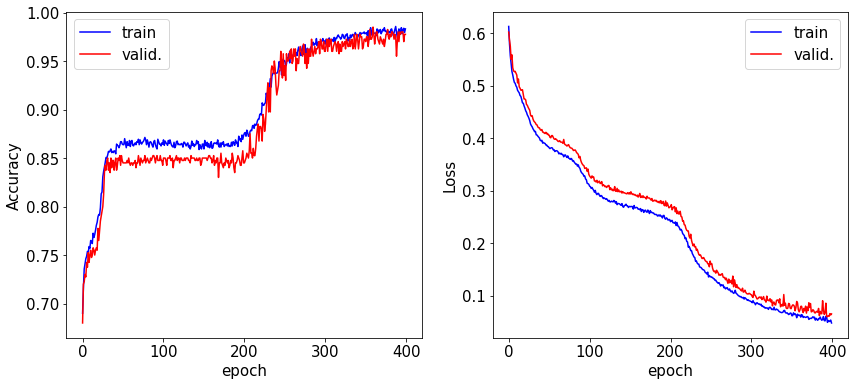

In [27]:
print('Max accuracy up to 40 epochs:', np.array(fit.history['val_accuracy'][:40]).max())
print('Min loss up to 40 epochs:', np.array(fit.history['val_loss'][:40]).min())

fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

As we can notice, with half of the data underfitting evidence starts to appear.  

We then perform another try with a more drastic reduction.

In [28]:
Nr = 1000 #Nr is the number of data samples we consider for the reduced dataset
Nr_train = int(perc_train*Nr)    
xr_train = x[0:Nr_train]
yr_train = y[0:Nr_train]
xr_valid = x[Nr_train:Nr]
yr_valid = y[Nr_train:Nr]

print("Train:",len(xr_train),"\t Validation:",len(xr_valid))

#rescale data
xr_train = Rescale(xr_train)
xr_valid = Rescale(xr_valid)

best_model_DNN = best_model()
fit = best_model_DNN.fit(xr_train, yr_train,
               epochs = 400, batch_size = 50,
               validation_data=(xr_valid,yr_valid),    
               verbose=2)

Train: 800 	 Validation: 200
Epoch 1/400
16/16 - 1s - loss: 0.6297 - accuracy: 0.6800 - val_loss: 0.6294 - val_accuracy: 0.6750 - 866ms/epoch - 54ms/step
Epoch 2/400
16/16 - 0s - loss: 0.5942 - accuracy: 0.7100 - val_loss: 0.6078 - val_accuracy: 0.7050 - 39ms/epoch - 2ms/step
Epoch 3/400
16/16 - 0s - loss: 0.5823 - accuracy: 0.7175 - val_loss: 0.5976 - val_accuracy: 0.7000 - 52ms/epoch - 3ms/step
Epoch 4/400
16/16 - 0s - loss: 0.5693 - accuracy: 0.7300 - val_loss: 0.5800 - val_accuracy: 0.7350 - 37ms/epoch - 2ms/step
Epoch 5/400
16/16 - 0s - loss: 0.5571 - accuracy: 0.7250 - val_loss: 0.5691 - val_accuracy: 0.7450 - 31ms/epoch - 2ms/step
Epoch 6/400
16/16 - 0s - loss: 0.5436 - accuracy: 0.7412 - val_loss: 0.5593 - val_accuracy: 0.7500 - 35ms/epoch - 2ms/step
Epoch 7/400
16/16 - 0s - loss: 0.5343 - accuracy: 0.7412 - val_loss: 0.5485 - val_accuracy: 0.7450 - 45ms/epoch - 3ms/step
Epoch 8/400
16/16 - 0s - loss: 0.5268 - accuracy: 0.7425 - val_loss: 0.5408 - val_accuracy: 0.7400 - 49ms/ep

Epoch 67/400
16/16 - 0s - loss: 0.3717 - accuracy: 0.8788 - val_loss: 0.4339 - val_accuracy: 0.8300 - 24ms/epoch - 1ms/step
Epoch 68/400
16/16 - 0s - loss: 0.3729 - accuracy: 0.8800 - val_loss: 0.4352 - val_accuracy: 0.8100 - 24ms/epoch - 1ms/step
Epoch 69/400
16/16 - 0s - loss: 0.3659 - accuracy: 0.8775 - val_loss: 0.4338 - val_accuracy: 0.8250 - 24ms/epoch - 2ms/step
Epoch 70/400
16/16 - 0s - loss: 0.3655 - accuracy: 0.8775 - val_loss: 0.4304 - val_accuracy: 0.8150 - 24ms/epoch - 2ms/step
Epoch 71/400
16/16 - 0s - loss: 0.3653 - accuracy: 0.8763 - val_loss: 0.4292 - val_accuracy: 0.8300 - 41ms/epoch - 3ms/step
Epoch 72/400
16/16 - 0s - loss: 0.3650 - accuracy: 0.8825 - val_loss: 0.4296 - val_accuracy: 0.8200 - 30ms/epoch - 2ms/step
Epoch 73/400
16/16 - 0s - loss: 0.3623 - accuracy: 0.8750 - val_loss: 0.4301 - val_accuracy: 0.8200 - 34ms/epoch - 2ms/step
Epoch 74/400
16/16 - 0s - loss: 0.3572 - accuracy: 0.8788 - val_loss: 0.4265 - val_accuracy: 0.8200 - 29ms/epoch - 2ms/step
Epoch 75

Epoch 133/400
16/16 - 0s - loss: 0.2708 - accuracy: 0.8900 - val_loss: 0.3547 - val_accuracy: 0.8400 - 29ms/epoch - 2ms/step
Epoch 134/400
16/16 - 0s - loss: 0.2742 - accuracy: 0.8875 - val_loss: 0.3488 - val_accuracy: 0.8350 - 33ms/epoch - 2ms/step
Epoch 135/400
16/16 - 0s - loss: 0.2743 - accuracy: 0.8850 - val_loss: 0.3501 - val_accuracy: 0.8350 - 28ms/epoch - 2ms/step
Epoch 136/400
16/16 - 0s - loss: 0.2756 - accuracy: 0.8838 - val_loss: 0.3506 - val_accuracy: 0.8400 - 25ms/epoch - 2ms/step
Epoch 137/400
16/16 - 0s - loss: 0.2722 - accuracy: 0.8888 - val_loss: 0.3463 - val_accuracy: 0.8350 - 27ms/epoch - 2ms/step
Epoch 138/400
16/16 - 0s - loss: 0.2658 - accuracy: 0.8900 - val_loss: 0.3474 - val_accuracy: 0.8350 - 31ms/epoch - 2ms/step
Epoch 139/400
16/16 - 0s - loss: 0.2642 - accuracy: 0.8925 - val_loss: 0.3480 - val_accuracy: 0.8400 - 32ms/epoch - 2ms/step
Epoch 140/400
16/16 - 0s - loss: 0.2647 - accuracy: 0.8875 - val_loss: 0.3429 - val_accuracy: 0.8350 - 30ms/epoch - 2ms/step


Epoch 199/400
16/16 - 0s - loss: 0.2359 - accuracy: 0.8888 - val_loss: 0.3100 - val_accuracy: 0.8400 - 35ms/epoch - 2ms/step
Epoch 200/400
16/16 - 0s - loss: 0.2360 - accuracy: 0.8888 - val_loss: 0.3108 - val_accuracy: 0.8400 - 36ms/epoch - 2ms/step
Epoch 201/400
16/16 - 0s - loss: 0.2346 - accuracy: 0.8838 - val_loss: 0.3159 - val_accuracy: 0.8450 - 32ms/epoch - 2ms/step
Epoch 202/400
16/16 - 0s - loss: 0.2361 - accuracy: 0.8925 - val_loss: 0.3081 - val_accuracy: 0.8400 - 34ms/epoch - 2ms/step
Epoch 203/400
16/16 - 0s - loss: 0.2381 - accuracy: 0.8875 - val_loss: 0.3166 - val_accuracy: 0.8400 - 34ms/epoch - 2ms/step
Epoch 204/400
16/16 - 0s - loss: 0.2340 - accuracy: 0.8900 - val_loss: 0.3100 - val_accuracy: 0.8450 - 35ms/epoch - 2ms/step
Epoch 205/400
16/16 - 0s - loss: 0.2320 - accuracy: 0.8913 - val_loss: 0.3090 - val_accuracy: 0.8450 - 39ms/epoch - 2ms/step
Epoch 206/400
16/16 - 0s - loss: 0.2325 - accuracy: 0.8900 - val_loss: 0.3140 - val_accuracy: 0.8400 - 36ms/epoch - 2ms/step


Epoch 265/400
16/16 - 0s - loss: 0.2121 - accuracy: 0.8925 - val_loss: 0.2721 - val_accuracy: 0.8550 - 46ms/epoch - 3ms/step
Epoch 266/400
16/16 - 0s - loss: 0.2090 - accuracy: 0.8925 - val_loss: 0.2872 - val_accuracy: 0.8400 - 34ms/epoch - 2ms/step
Epoch 267/400
16/16 - 0s - loss: 0.2110 - accuracy: 0.8913 - val_loss: 0.2675 - val_accuracy: 0.8550 - 27ms/epoch - 2ms/step
Epoch 268/400
16/16 - 0s - loss: 0.2061 - accuracy: 0.8963 - val_loss: 0.2655 - val_accuracy: 0.8600 - 30ms/epoch - 2ms/step
Epoch 269/400
16/16 - 0s - loss: 0.2028 - accuracy: 0.8938 - val_loss: 0.2620 - val_accuracy: 0.8550 - 30ms/epoch - 2ms/step
Epoch 270/400
16/16 - 0s - loss: 0.2021 - accuracy: 0.8950 - val_loss: 0.2662 - val_accuracy: 0.8400 - 28ms/epoch - 2ms/step
Epoch 271/400
16/16 - 0s - loss: 0.2006 - accuracy: 0.8925 - val_loss: 0.2546 - val_accuracy: 0.8600 - 33ms/epoch - 2ms/step
Epoch 272/400
16/16 - 0s - loss: 0.1984 - accuracy: 0.9025 - val_loss: 0.2672 - val_accuracy: 0.8400 - 32ms/epoch - 2ms/step


Epoch 331/400
16/16 - 0s - loss: 0.1200 - accuracy: 0.9638 - val_loss: 0.1619 - val_accuracy: 0.9300 - 32ms/epoch - 2ms/step
Epoch 332/400
16/16 - 0s - loss: 0.1206 - accuracy: 0.9525 - val_loss: 0.1657 - val_accuracy: 0.9350 - 48ms/epoch - 3ms/step
Epoch 333/400
16/16 - 0s - loss: 0.1178 - accuracy: 0.9613 - val_loss: 0.1641 - val_accuracy: 0.9400 - 44ms/epoch - 3ms/step
Epoch 334/400
16/16 - 0s - loss: 0.1152 - accuracy: 0.9663 - val_loss: 0.1632 - val_accuracy: 0.9400 - 43ms/epoch - 3ms/step
Epoch 335/400
16/16 - 0s - loss: 0.1129 - accuracy: 0.9663 - val_loss: 0.1681 - val_accuracy: 0.9150 - 41ms/epoch - 3ms/step
Epoch 336/400
16/16 - 0s - loss: 0.1212 - accuracy: 0.9575 - val_loss: 0.1619 - val_accuracy: 0.9500 - 46ms/epoch - 3ms/step
Epoch 337/400
16/16 - 0s - loss: 0.1156 - accuracy: 0.9600 - val_loss: 0.1740 - val_accuracy: 0.9500 - 42ms/epoch - 3ms/step
Epoch 338/400
16/16 - 0s - loss: 0.1131 - accuracy: 0.9563 - val_loss: 0.1572 - val_accuracy: 0.9400 - 46ms/epoch - 3ms/step


Epoch 397/400
16/16 - 0s - loss: 0.0794 - accuracy: 0.9675 - val_loss: 0.1207 - val_accuracy: 0.9500 - 34ms/epoch - 2ms/step
Epoch 398/400
16/16 - 0s - loss: 0.0798 - accuracy: 0.9675 - val_loss: 0.1183 - val_accuracy: 0.9500 - 36ms/epoch - 2ms/step
Epoch 399/400
16/16 - 0s - loss: 0.0815 - accuracy: 0.9688 - val_loss: 0.1191 - val_accuracy: 0.9500 - 40ms/epoch - 2ms/step
Epoch 400/400
16/16 - 0s - loss: 0.0814 - accuracy: 0.9700 - val_loss: 0.1304 - val_accuracy: 0.9600 - 33ms/epoch - 2ms/step


Max accuracy up to 40 epochs: 0.7850000262260437
Min loss up to 40 epochs: 0.47062018513679504


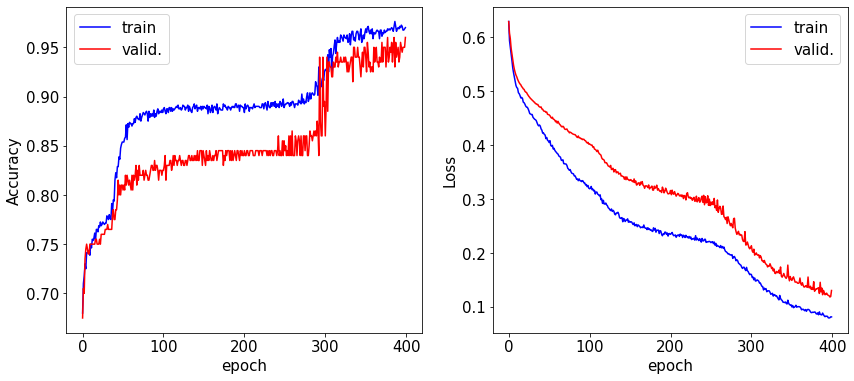

In [29]:
print('Max accuracy up to 40 epochs:', np.array(fit.history['val_accuracy'][:40]).max())
print('Min loss up to 40 epochs:', np.array(fit.history['val_loss'][:40]).min())

fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

As we can see a drastic reduction of data to train lead to the underfitting scenario, which means that our data model is unable to interpret the correlation between input and output variables. As we can see both training and validation loss are quite bad.

## P 2.B Data incrementation

In the following code the data incremetation tecnique is applied to the previous dataset. The new dataset's variables are indicated with capital letters 'X' for the features and 'Y' for the labels. In particular N=10000 points were generated and preprocessed. We then trained the model using the best parameters previously founded using grid search methods.

<function matplotlib.pyplot.show(close=None, block=None)>

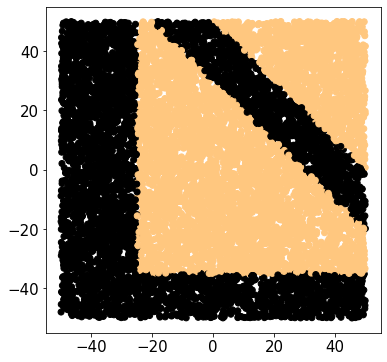

In [30]:
#importing the incremented data
TYPE=1
X = np.loadtxt(filename("data_incremented",TYPE), delimiter=' ')
Y = np.loadtxt(filename("labels_incremented",TYPE), delimiter=' ')
plt.figure(figsize = (6,6))
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show

In [31]:
#divide the data into training and validation
N = len(X)
N_incr_train = int(perc_train * N)
X_train = X[0:N_incr_train]
Y_train = Y[0:N_incr_train]
X_valid = X[N_incr_train:N]
Y_valid = Y[N_incr_train:N]

print("Train:",len(X_train),"\t Validation:",len(X_valid))

#rescale the data
X_train = Rescale(X_train)
X_valid = Rescale(X_valid)

Train: 8000 	 Validation: 2000


In [32]:
#best model from previous point
def best_model(activation=best_act,optimizer=best_opt):
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation=best_act))
    model.add(Dense(20,activation=best_act))
    model.add(Dense(20,activation=best_act))
    model.add(Dense(20,activation=best_act))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
    model.compile(loss='binary_crossentropy',
                  optimizer=best_opt,           
                  metrics=['accuracy'])
    return model

best_model_DNN = best_model()

#train the model (the model is the best model founded in point 1)
fit = best_model_DNN.fit(X_train, Y_train,
               epochs = 400, batch_size = 50,
               validation_data=(X_valid,Y_valid),   
               verbose=2)

Epoch 1/400
160/160 - 1s - loss: 0.5556 - accuracy: 0.7299 - val_loss: 0.5068 - val_accuracy: 0.7595 - 886ms/epoch - 6ms/step
Epoch 2/400
160/160 - 0s - loss: 0.4863 - accuracy: 0.7611 - val_loss: 0.4639 - val_accuracy: 0.7700 - 245ms/epoch - 2ms/step
Epoch 3/400
160/160 - 0s - loss: 0.4422 - accuracy: 0.8181 - val_loss: 0.4204 - val_accuracy: 0.8585 - 159ms/epoch - 994us/step
Epoch 4/400
160/160 - 0s - loss: 0.4058 - accuracy: 0.8620 - val_loss: 0.3919 - val_accuracy: 0.8670 - 131ms/epoch - 820us/step
Epoch 5/400
160/160 - 0s - loss: 0.3827 - accuracy: 0.8659 - val_loss: 0.3738 - val_accuracy: 0.8680 - 121ms/epoch - 757us/step
Epoch 6/400
160/160 - 0s - loss: 0.3669 - accuracy: 0.8696 - val_loss: 0.3625 - val_accuracy: 0.8710 - 136ms/epoch - 847us/step
Epoch 7/400
160/160 - 0s - loss: 0.3542 - accuracy: 0.8700 - val_loss: 0.3464 - val_accuracy: 0.8710 - 133ms/epoch - 831us/step
Epoch 8/400
160/160 - 0s - loss: 0.3403 - accuracy: 0.8716 - val_loss: 0.3303 - val_accuracy: 0.8690 - 131ms

Epoch 65/400
160/160 - 0s - loss: 0.0563 - accuracy: 0.9779 - val_loss: 0.0457 - val_accuracy: 0.9840 - 198ms/epoch - 1ms/step
Epoch 66/400
160/160 - 0s - loss: 0.0550 - accuracy: 0.9784 - val_loss: 0.0488 - val_accuracy: 0.9815 - 127ms/epoch - 796us/step
Epoch 67/400
160/160 - 0s - loss: 0.0515 - accuracy: 0.9820 - val_loss: 0.0468 - val_accuracy: 0.9820 - 133ms/epoch - 834us/step
Epoch 68/400
160/160 - 0s - loss: 0.0557 - accuracy: 0.9785 - val_loss: 0.0504 - val_accuracy: 0.9830 - 119ms/epoch - 747us/step
Epoch 69/400
160/160 - 0s - loss: 0.0519 - accuracy: 0.9811 - val_loss: 0.0494 - val_accuracy: 0.9820 - 111ms/epoch - 695us/step
Epoch 70/400
160/160 - 0s - loss: 0.0528 - accuracy: 0.9809 - val_loss: 0.0521 - val_accuracy: 0.9805 - 194ms/epoch - 1ms/step
Epoch 71/400
160/160 - 0s - loss: 0.0528 - accuracy: 0.9803 - val_loss: 0.0384 - val_accuracy: 0.9885 - 139ms/epoch - 867us/step
Epoch 72/400
160/160 - 0s - loss: 0.0490 - accuracy: 0.9816 - val_loss: 0.0414 - val_accuracy: 0.9855

Epoch 129/400
160/160 - 0s - loss: 0.0353 - accuracy: 0.9854 - val_loss: 0.0266 - val_accuracy: 0.9880 - 133ms/epoch - 829us/step
Epoch 130/400
160/160 - 0s - loss: 0.0357 - accuracy: 0.9864 - val_loss: 0.0305 - val_accuracy: 0.9835 - 124ms/epoch - 773us/step
Epoch 131/400
160/160 - 0s - loss: 0.0358 - accuracy: 0.9854 - val_loss: 0.0297 - val_accuracy: 0.9860 - 121ms/epoch - 754us/step
Epoch 132/400
160/160 - 0s - loss: 0.0328 - accuracy: 0.9870 - val_loss: 0.0289 - val_accuracy: 0.9880 - 119ms/epoch - 743us/step
Epoch 133/400
160/160 - 0s - loss: 0.0330 - accuracy: 0.9866 - val_loss: 0.0254 - val_accuracy: 0.9915 - 131ms/epoch - 819us/step
Epoch 134/400
160/160 - 0s - loss: 0.0363 - accuracy: 0.9847 - val_loss: 0.0225 - val_accuracy: 0.9935 - 130ms/epoch - 811us/step
Epoch 135/400
160/160 - 0s - loss: 0.0347 - accuracy: 0.9858 - val_loss: 0.0267 - val_accuracy: 0.9885 - 132ms/epoch - 822us/step
Epoch 136/400
160/160 - 0s - loss: 0.0346 - accuracy: 0.9860 - val_loss: 0.0316 - val_accu

160/160 - 0s - loss: 0.0277 - accuracy: 0.9885 - val_loss: 0.0288 - val_accuracy: 0.9865 - 111ms/epoch - 693us/step
Epoch 193/400
160/160 - 0s - loss: 0.0291 - accuracy: 0.9885 - val_loss: 0.0211 - val_accuracy: 0.9925 - 114ms/epoch - 715us/step
Epoch 194/400
160/160 - 0s - loss: 0.0273 - accuracy: 0.9886 - val_loss: 0.0236 - val_accuracy: 0.9885 - 115ms/epoch - 720us/step
Epoch 195/400
160/160 - 0s - loss: 0.0324 - accuracy: 0.9869 - val_loss: 0.0200 - val_accuracy: 0.9930 - 114ms/epoch - 715us/step
Epoch 196/400
160/160 - 0s - loss: 0.0281 - accuracy: 0.9884 - val_loss: 0.0222 - val_accuracy: 0.9905 - 113ms/epoch - 707us/step
Epoch 197/400
160/160 - 0s - loss: 0.0311 - accuracy: 0.9865 - val_loss: 0.0298 - val_accuracy: 0.9855 - 114ms/epoch - 710us/step
Epoch 198/400
160/160 - 0s - loss: 0.0310 - accuracy: 0.9856 - val_loss: 0.0245 - val_accuracy: 0.9875 - 112ms/epoch - 697us/step
Epoch 199/400
160/160 - 0s - loss: 0.0304 - accuracy: 0.9868 - val_loss: 0.0293 - val_accuracy: 0.9870 -

Epoch 256/400
160/160 - 0s - loss: 0.0267 - accuracy: 0.9889 - val_loss: 0.0203 - val_accuracy: 0.9930 - 120ms/epoch - 749us/step
Epoch 257/400
160/160 - 0s - loss: 0.0267 - accuracy: 0.9880 - val_loss: 0.0259 - val_accuracy: 0.9875 - 115ms/epoch - 720us/step
Epoch 258/400
160/160 - 0s - loss: 0.0290 - accuracy: 0.9890 - val_loss: 0.0172 - val_accuracy: 0.9935 - 116ms/epoch - 727us/step
Epoch 259/400
160/160 - 0s - loss: 0.0300 - accuracy: 0.9875 - val_loss: 0.0219 - val_accuracy: 0.9930 - 166ms/epoch - 1ms/step
Epoch 260/400
160/160 - 0s - loss: 0.0248 - accuracy: 0.9891 - val_loss: 0.0251 - val_accuracy: 0.9875 - 120ms/epoch - 750us/step
Epoch 261/400
160/160 - 0s - loss: 0.0255 - accuracy: 0.9899 - val_loss: 0.0169 - val_accuracy: 0.9935 - 118ms/epoch - 735us/step
Epoch 262/400
160/160 - 0s - loss: 0.0269 - accuracy: 0.9893 - val_loss: 0.0216 - val_accuracy: 0.9895 - 114ms/epoch - 712us/step
Epoch 263/400
160/160 - 0s - loss: 0.0296 - accuracy: 0.9883 - val_loss: 0.0192 - val_accura

Epoch 320/400
160/160 - 0s - loss: 0.0266 - accuracy: 0.9890 - val_loss: 0.0326 - val_accuracy: 0.9840 - 170ms/epoch - 1ms/step
Epoch 321/400
160/160 - 0s - loss: 0.0274 - accuracy: 0.9887 - val_loss: 0.0277 - val_accuracy: 0.9885 - 141ms/epoch - 884us/step
Epoch 322/400
160/160 - 0s - loss: 0.0296 - accuracy: 0.9865 - val_loss: 0.0210 - val_accuracy: 0.9910 - 123ms/epoch - 768us/step
Epoch 323/400
160/160 - 0s - loss: 0.0251 - accuracy: 0.9895 - val_loss: 0.0266 - val_accuracy: 0.9920 - 133ms/epoch - 833us/step
Epoch 324/400
160/160 - 0s - loss: 0.0241 - accuracy: 0.9896 - val_loss: 0.0164 - val_accuracy: 0.9915 - 133ms/epoch - 829us/step
Epoch 325/400
160/160 - 0s - loss: 0.0265 - accuracy: 0.9886 - val_loss: 0.0203 - val_accuracy: 0.9905 - 248ms/epoch - 2ms/step
Epoch 326/400
160/160 - 0s - loss: 0.0249 - accuracy: 0.9890 - val_loss: 0.0157 - val_accuracy: 0.9930 - 177ms/epoch - 1ms/step
Epoch 327/400
160/160 - 0s - loss: 0.0243 - accuracy: 0.9908 - val_loss: 0.0304 - val_accuracy: 

Epoch 384/400
160/160 - 0s - loss: 0.0237 - accuracy: 0.9896 - val_loss: 0.0252 - val_accuracy: 0.9885 - 158ms/epoch - 989us/step
Epoch 385/400
160/160 - 0s - loss: 0.0233 - accuracy: 0.9904 - val_loss: 0.0254 - val_accuracy: 0.9880 - 121ms/epoch - 757us/step
Epoch 386/400
160/160 - 0s - loss: 0.0242 - accuracy: 0.9894 - val_loss: 0.0186 - val_accuracy: 0.9925 - 134ms/epoch - 839us/step
Epoch 387/400
160/160 - 0s - loss: 0.0265 - accuracy: 0.9886 - val_loss: 0.0230 - val_accuracy: 0.9915 - 130ms/epoch - 814us/step
Epoch 388/400
160/160 - 0s - loss: 0.0252 - accuracy: 0.9900 - val_loss: 0.0191 - val_accuracy: 0.9905 - 170ms/epoch - 1ms/step
Epoch 389/400
160/160 - 0s - loss: 0.0224 - accuracy: 0.9918 - val_loss: 0.0154 - val_accuracy: 0.9940 - 129ms/epoch - 806us/step
Epoch 390/400
160/160 - 0s - loss: 0.0241 - accuracy: 0.9898 - val_loss: 0.0317 - val_accuracy: 0.9855 - 118ms/epoch - 739us/step
Epoch 391/400
160/160 - 0s - loss: 0.0243 - accuracy: 0.9900 - val_loss: 0.0213 - val_accura

Max accuracy up to 40 epochs: 0.9645000100135803
Min loss up to 40 epochs: 0.09734830260276794


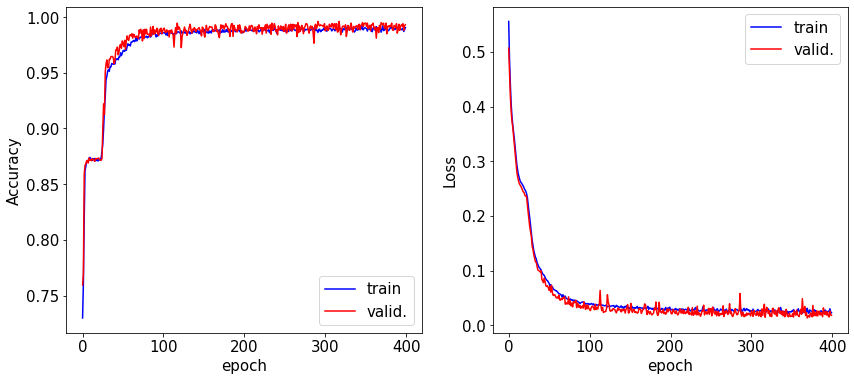

In [33]:
print('Max accuracy up to 40 epochs:', np.array(fit.history['val_accuracy'][:40]).max())
print('Min loss up to 40 epochs:', np.array(fit.history['val_loss'][:40]).min())

fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

## P 2.C Data augmentation

To augment our dataset we try to add some noise to it, as it works like a shift. For this reason we applied a random noise with uniform probability between(-0.02, +0.02).    
We add this shift only to the train set, because we want the validation to evaluate the performance on the real data.

In [34]:
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

data: 4000
train: 3200


In [35]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])  
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Our data at the beginning:")
print("Train:",len(x_train),"\t Validation:",len(x_valid))

x_shift = x_train + np.random.uniform(-0.02, 0.02, size=x_train.shape)
y_shift = np.copy(y_train)

x_aug = np.concatenate((x_train,x_shift))
y_aug = np.concatenate((y_train,y_shift))
print('After augmentation')
print("Train:",len(x_aug),"\t Validation:",len(x_valid))


Our data at the beginning:
Train: 3200 	 Validation: 800
After augmentation
Train: 6400 	 Validation: 800


In [36]:
#use rescale function like before
x_aug = Rescale(x_aug)
x_valid = Rescale(x_valid)

<function matplotlib.pyplot.show(close=None, block=None)>

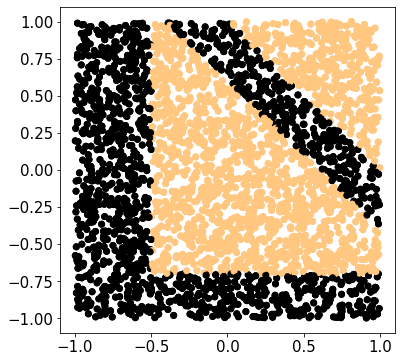

In [37]:
plt.figure(figsize = (6,6))
plt.scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
plt.show

In [49]:
def best_model(activation=best_act,optimizer=best_opt):
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation=best_act))
    model.add(Dense(20,activation=best_act))
    model.add(Dense(20,activation=best_act))
    model.add(Dense(20,activation=best_act))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
    model.compile(loss='binary_crossentropy',
                  optimizer=best_opt,           
                  metrics=['accuracy'])
    return model

best_model_DNN = best_model()

In [50]:
fit = best_model_DNN.fit(x_aug, y_aug,
               epochs = 400, batch_size = 50,
               validation_data=(x_valid,y_valid),   
               verbose=2)

Epoch 1/400
128/128 - 1s - loss: 0.5825 - accuracy: 0.7139 - val_loss: 0.5487 - val_accuracy: 0.7312 - 760ms/epoch - 6ms/step
Epoch 2/400
128/128 - 0s - loss: 0.5206 - accuracy: 0.7491 - val_loss: 0.5114 - val_accuracy: 0.7450 - 105ms/epoch - 820us/step
Epoch 3/400
128/128 - 0s - loss: 0.4991 - accuracy: 0.7573 - val_loss: 0.4987 - val_accuracy: 0.7588 - 113ms/epoch - 880us/step
Epoch 4/400
128/128 - 0s - loss: 0.4897 - accuracy: 0.7577 - val_loss: 0.4876 - val_accuracy: 0.7675 - 121ms/epoch - 945us/step
Epoch 5/400
128/128 - 0s - loss: 0.4813 - accuracy: 0.7620 - val_loss: 0.4773 - val_accuracy: 0.7713 - 123ms/epoch - 960us/step
Epoch 6/400
128/128 - 0s - loss: 0.4754 - accuracy: 0.7653 - val_loss: 0.4697 - val_accuracy: 0.7713 - 104ms/epoch - 812us/step
Epoch 7/400
128/128 - 0s - loss: 0.4706 - accuracy: 0.7645 - val_loss: 0.4642 - val_accuracy: 0.7725 - 110ms/epoch - 856us/step
Epoch 8/400
128/128 - 0s - loss: 0.4645 - accuracy: 0.7666 - val_loss: 0.4604 - val_accuracy: 0.7713 - 113

Epoch 65/400
128/128 - 0s - loss: 0.0884 - accuracy: 0.9645 - val_loss: 0.0814 - val_accuracy: 0.9688 - 90ms/epoch - 706us/step
Epoch 66/400
128/128 - 0s - loss: 0.0870 - accuracy: 0.9631 - val_loss: 0.0722 - val_accuracy: 0.9700 - 89ms/epoch - 699us/step
Epoch 67/400
128/128 - 0s - loss: 0.0831 - accuracy: 0.9667 - val_loss: 0.0722 - val_accuracy: 0.9725 - 99ms/epoch - 776us/step
Epoch 68/400
128/128 - 0s - loss: 0.0833 - accuracy: 0.9634 - val_loss: 0.0755 - val_accuracy: 0.9650 - 109ms/epoch - 854us/step
Epoch 69/400
128/128 - 0s - loss: 0.0832 - accuracy: 0.9655 - val_loss: 0.0661 - val_accuracy: 0.9750 - 107ms/epoch - 837us/step
Epoch 70/400
128/128 - 0s - loss: 0.0807 - accuracy: 0.9658 - val_loss: 0.0716 - val_accuracy: 0.9762 - 109ms/epoch - 850us/step
Epoch 71/400
128/128 - 0s - loss: 0.0783 - accuracy: 0.9692 - val_loss: 0.0768 - val_accuracy: 0.9650 - 108ms/epoch - 845us/step
Epoch 72/400
128/128 - 0s - loss: 0.0768 - accuracy: 0.9683 - val_loss: 0.0659 - val_accuracy: 0.972

Epoch 129/400
128/128 - 0s - loss: 0.0436 - accuracy: 0.9842 - val_loss: 0.0396 - val_accuracy: 0.9862 - 107ms/epoch - 834us/step
Epoch 130/400
128/128 - 0s - loss: 0.0421 - accuracy: 0.9867 - val_loss: 0.0418 - val_accuracy: 0.9875 - 96ms/epoch - 752us/step
Epoch 131/400
128/128 - 0s - loss: 0.0423 - accuracy: 0.9850 - val_loss: 0.0391 - val_accuracy: 0.9875 - 106ms/epoch - 827us/step
Epoch 132/400
128/128 - 0s - loss: 0.0416 - accuracy: 0.9848 - val_loss: 0.0504 - val_accuracy: 0.9775 - 103ms/epoch - 807us/step
Epoch 133/400
128/128 - 0s - loss: 0.0418 - accuracy: 0.9852 - val_loss: 0.0376 - val_accuracy: 0.9850 - 106ms/epoch - 827us/step
Epoch 134/400
128/128 - 0s - loss: 0.0435 - accuracy: 0.9845 - val_loss: 0.0446 - val_accuracy: 0.9837 - 105ms/epoch - 816us/step
Epoch 135/400
128/128 - 0s - loss: 0.0422 - accuracy: 0.9842 - val_loss: 0.0382 - val_accuracy: 0.9862 - 105ms/epoch - 823us/step
Epoch 136/400
128/128 - 0s - loss: 0.0408 - accuracy: 0.9862 - val_loss: 0.0422 - val_accur

Epoch 193/400
128/128 - 0s - loss: 0.0318 - accuracy: 0.9878 - val_loss: 0.0287 - val_accuracy: 0.9875 - 113ms/epoch - 886us/step
Epoch 194/400
128/128 - 0s - loss: 0.0297 - accuracy: 0.9895 - val_loss: 0.0302 - val_accuracy: 0.9862 - 124ms/epoch - 965us/step
Epoch 195/400
128/128 - 0s - loss: 0.0308 - accuracy: 0.9889 - val_loss: 0.0583 - val_accuracy: 0.9775 - 115ms/epoch - 900us/step
Epoch 196/400
128/128 - 0s - loss: 0.0304 - accuracy: 0.9906 - val_loss: 0.0319 - val_accuracy: 0.9862 - 127ms/epoch - 992us/step
Epoch 197/400
128/128 - 0s - loss: 0.0303 - accuracy: 0.9895 - val_loss: 0.0435 - val_accuracy: 0.9887 - 106ms/epoch - 831us/step
Epoch 198/400
128/128 - 0s - loss: 0.0308 - accuracy: 0.9887 - val_loss: 0.0322 - val_accuracy: 0.9837 - 126ms/epoch - 987us/step
Epoch 199/400
128/128 - 0s - loss: 0.0345 - accuracy: 0.9875 - val_loss: 0.0279 - val_accuracy: 0.9875 - 113ms/epoch - 887us/step
Epoch 200/400
128/128 - 0s - loss: 0.0286 - accuracy: 0.9892 - val_loss: 0.0399 - val_accu

128/128 - 0s - loss: 0.0284 - accuracy: 0.9875 - val_loss: 0.0311 - val_accuracy: 0.9887 - 126ms/epoch - 983us/step
Epoch 257/400
128/128 - 0s - loss: 0.0282 - accuracy: 0.9884 - val_loss: 0.0306 - val_accuracy: 0.9850 - 114ms/epoch - 888us/step
Epoch 258/400
128/128 - 0s - loss: 0.0242 - accuracy: 0.9902 - val_loss: 0.0221 - val_accuracy: 0.9925 - 117ms/epoch - 915us/step
Epoch 259/400
128/128 - 0s - loss: 0.0266 - accuracy: 0.9892 - val_loss: 0.0250 - val_accuracy: 0.9900 - 116ms/epoch - 910us/step
Epoch 260/400
128/128 - 0s - loss: 0.0239 - accuracy: 0.9902 - val_loss: 0.0265 - val_accuracy: 0.9875 - 118ms/epoch - 921us/step
Epoch 261/400
128/128 - 0s - loss: 0.0241 - accuracy: 0.9908 - val_loss: 0.0305 - val_accuracy: 0.9912 - 114ms/epoch - 887us/step
Epoch 262/400
128/128 - 0s - loss: 0.0261 - accuracy: 0.9900 - val_loss: 0.0354 - val_accuracy: 0.9875 - 113ms/epoch - 885us/step
Epoch 263/400
128/128 - 0s - loss: 0.0236 - accuracy: 0.9902 - val_loss: 0.0316 - val_accuracy: 0.9837 -

Epoch 320/400
128/128 - 0s - loss: 0.0248 - accuracy: 0.9903 - val_loss: 0.0307 - val_accuracy: 0.9887 - 144ms/epoch - 1ms/step
Epoch 321/400
128/128 - 0s - loss: 0.0225 - accuracy: 0.9919 - val_loss: 0.0409 - val_accuracy: 0.9825 - 90ms/epoch - 704us/step
Epoch 322/400
128/128 - 0s - loss: 0.0233 - accuracy: 0.9911 - val_loss: 0.0280 - val_accuracy: 0.9875 - 93ms/epoch - 725us/step
Epoch 323/400
128/128 - 0s - loss: 0.0205 - accuracy: 0.9925 - val_loss: 0.0373 - val_accuracy: 0.9875 - 158ms/epoch - 1ms/step
Epoch 324/400
128/128 - 0s - loss: 0.0219 - accuracy: 0.9917 - val_loss: 0.0197 - val_accuracy: 0.9900 - 104ms/epoch - 811us/step
Epoch 325/400
128/128 - 0s - loss: 0.0204 - accuracy: 0.9928 - val_loss: 0.0350 - val_accuracy: 0.9825 - 105ms/epoch - 817us/step
Epoch 326/400
128/128 - 0s - loss: 0.0250 - accuracy: 0.9892 - val_loss: 0.0369 - val_accuracy: 0.9887 - 119ms/epoch - 926us/step
Epoch 327/400
128/128 - 0s - loss: 0.0218 - accuracy: 0.9906 - val_loss: 0.0215 - val_accuracy: 

Epoch 384/400
128/128 - 0s - loss: 0.0222 - accuracy: 0.9906 - val_loss: 0.0193 - val_accuracy: 0.9887 - 120ms/epoch - 935us/step
Epoch 385/400
128/128 - 0s - loss: 0.0213 - accuracy: 0.9909 - val_loss: 0.0221 - val_accuracy: 0.9887 - 123ms/epoch - 961us/step
Epoch 386/400
128/128 - 0s - loss: 0.0197 - accuracy: 0.9928 - val_loss: 0.0176 - val_accuracy: 0.9912 - 124ms/epoch - 967us/step
Epoch 387/400
128/128 - 0s - loss: 0.0216 - accuracy: 0.9920 - val_loss: 0.0228 - val_accuracy: 0.9887 - 104ms/epoch - 816us/step
Epoch 388/400
128/128 - 0s - loss: 0.0203 - accuracy: 0.9919 - val_loss: 0.0241 - val_accuracy: 0.9887 - 116ms/epoch - 909us/step
Epoch 389/400
128/128 - 0s - loss: 0.0215 - accuracy: 0.9914 - val_loss: 0.0209 - val_accuracy: 0.9925 - 132ms/epoch - 1ms/step
Epoch 390/400
128/128 - 0s - loss: 0.0227 - accuracy: 0.9905 - val_loss: 0.0281 - val_accuracy: 0.9875 - 115ms/epoch - 899us/step
Epoch 391/400
128/128 - 0s - loss: 0.0215 - accuracy: 0.9909 - val_loss: 0.0519 - val_accura

Max accuracy up to 40 epochs: 0.9474999904632568
Min loss up to 40 epochs: 0.14990855753421783


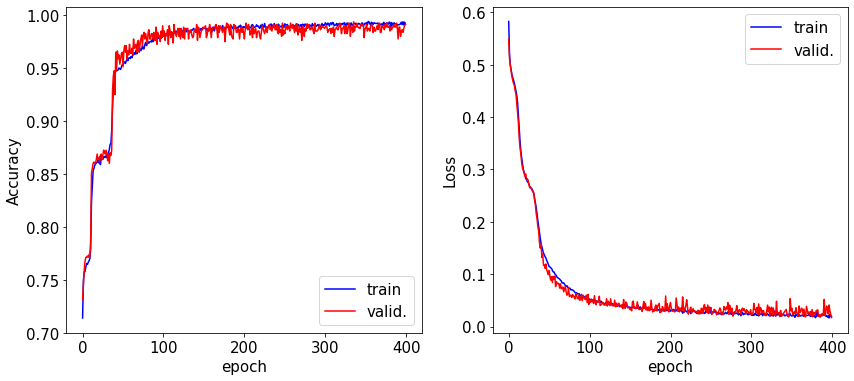

In [51]:
print('Max accuracy up to 40 epochs:', np.array(fit.history['val_accuracy'][:40]).max())
print('Min loss up to 40 epochs:', np.array(fit.history['val_loss'][:40]).min())

fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

With half the trainig set consisting of shifted data, the performance is similar to the one we had with incrementation, even if we can notice more fluctuations in the validation loss. This might be due to the fact that with augmented data the dataset is less representative of the real data.   

We now make another try with a less number of shifted data with the same shift, which seemed reasonable from the results obtained.

In [52]:
#Reducing the number of shifted data

xs_shift = x_shift[0:1600]
ys_shift = y_shift[0:1600]

xs_aug = np.concatenate((x_train,xs_shift))
ys_aug = np.concatenate((y_train,ys_shift))
print('After augmentation')
print("Train:",len(xs_aug),"\t Validation:",len(x_valid))


After augmentation
Train: 4800 	 Validation: 800


In [53]:
xs_aug = Rescale(xs_aug)  #we only rescale the training set, since validation one was already rescaled

<function matplotlib.pyplot.show(close=None, block=None)>

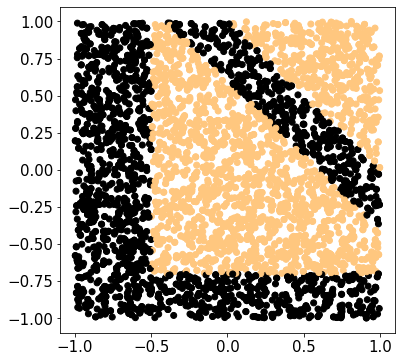

In [54]:
plt.figure(figsize = (6,6))
plt.scatter(xs_aug[:,0],xs_aug[:,1],c=ys_aug)
plt.show

In [55]:
def best_model(activation=best_act,optimizer=best_opt):
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation=best_act))
    model.add(Dense(20,activation=best_act))
    model.add(Dense(20,activation=best_act))
    model.add(Dense(20,activation=best_act))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
    model.compile(loss='binary_crossentropy',
                  optimizer=best_opt,           
                  metrics=['accuracy'])
    return model

best_model_DNN = best_model()

In [56]:
fit = best_model_DNN.fit(xs_aug, ys_aug,
               epochs = 400, batch_size = 50,
               validation_data=(x_valid,y_valid),   
               verbose=2)

Epoch 1/400
96/96 - 1s - loss: 0.5638 - accuracy: 0.7246 - val_loss: 0.5097 - val_accuracy: 0.7613 - 713ms/epoch - 7ms/step
Epoch 2/400
96/96 - 0s - loss: 0.4842 - accuracy: 0.7952 - val_loss: 0.4513 - val_accuracy: 0.8175 - 91ms/epoch - 947us/step
Epoch 3/400
96/96 - 0s - loss: 0.4446 - accuracy: 0.8235 - val_loss: 0.4179 - val_accuracy: 0.8450 - 81ms/epoch - 845us/step
Epoch 4/400
96/96 - 0s - loss: 0.4180 - accuracy: 0.8392 - val_loss: 0.4048 - val_accuracy: 0.8587 - 80ms/epoch - 837us/step
Epoch 5/400
96/96 - 0s - loss: 0.3991 - accuracy: 0.8521 - val_loss: 0.3878 - val_accuracy: 0.8575 - 81ms/epoch - 847us/step
Epoch 6/400
96/96 - 0s - loss: 0.3859 - accuracy: 0.8529 - val_loss: 0.3848 - val_accuracy: 0.8600 - 80ms/epoch - 828us/step
Epoch 7/400
96/96 - 0s - loss: 0.3761 - accuracy: 0.8567 - val_loss: 0.3710 - val_accuracy: 0.8575 - 79ms/epoch - 818us/step
Epoch 8/400
96/96 - 0s - loss: 0.3636 - accuracy: 0.8592 - val_loss: 0.3603 - val_accuracy: 0.8625 - 128ms/epoch - 1ms/step
Ep

Epoch 67/400
96/96 - 0s - loss: 0.1785 - accuracy: 0.9212 - val_loss: 0.1745 - val_accuracy: 0.9225 - 80ms/epoch - 829us/step
Epoch 68/400
96/96 - 0s - loss: 0.1760 - accuracy: 0.9194 - val_loss: 0.1688 - val_accuracy: 0.9362 - 81ms/epoch - 841us/step
Epoch 69/400
96/96 - 0s - loss: 0.1750 - accuracy: 0.9192 - val_loss: 0.1723 - val_accuracy: 0.9275 - 80ms/epoch - 834us/step
Epoch 70/400
96/96 - 0s - loss: 0.1729 - accuracy: 0.9212 - val_loss: 0.1666 - val_accuracy: 0.9262 - 92ms/epoch - 958us/step
Epoch 71/400
96/96 - 0s - loss: 0.1702 - accuracy: 0.9229 - val_loss: 0.1742 - val_accuracy: 0.9312 - 80ms/epoch - 837us/step
Epoch 72/400
96/96 - 0s - loss: 0.1702 - accuracy: 0.9258 - val_loss: 0.1651 - val_accuracy: 0.9225 - 87ms/epoch - 909us/step
Epoch 73/400
96/96 - 0s - loss: 0.1653 - accuracy: 0.9275 - val_loss: 0.1613 - val_accuracy: 0.9400 - 82ms/epoch - 853us/step
Epoch 74/400
96/96 - 0s - loss: 0.1665 - accuracy: 0.9283 - val_loss: 0.1630 - val_accuracy: 0.9400 - 91ms/epoch - 945

Epoch 132/400
96/96 - 0s - loss: 0.1032 - accuracy: 0.9642 - val_loss: 0.0938 - val_accuracy: 0.9725 - 91ms/epoch - 949us/step
Epoch 133/400
96/96 - 0s - loss: 0.0962 - accuracy: 0.9669 - val_loss: 0.0967 - val_accuracy: 0.9600 - 89ms/epoch - 928us/step
Epoch 134/400
96/96 - 0s - loss: 0.0993 - accuracy: 0.9596 - val_loss: 0.0959 - val_accuracy: 0.9725 - 92ms/epoch - 955us/step
Epoch 135/400
96/96 - 0s - loss: 0.0986 - accuracy: 0.9658 - val_loss: 0.0972 - val_accuracy: 0.9663 - 101ms/epoch - 1ms/step
Epoch 136/400
96/96 - 0s - loss: 0.0980 - accuracy: 0.9652 - val_loss: 0.0912 - val_accuracy: 0.9663 - 109ms/epoch - 1ms/step
Epoch 137/400
96/96 - 0s - loss: 0.0951 - accuracy: 0.9665 - val_loss: 0.0929 - val_accuracy: 0.9663 - 127ms/epoch - 1ms/step
Epoch 138/400
96/96 - 0s - loss: 0.0955 - accuracy: 0.9667 - val_loss: 0.0908 - val_accuracy: 0.9675 - 106ms/epoch - 1ms/step
Epoch 139/400
96/96 - 0s - loss: 0.0958 - accuracy: 0.9656 - val_loss: 0.0890 - val_accuracy: 0.9737 - 97ms/epoch -

Epoch 197/400
96/96 - 0s - loss: 0.0675 - accuracy: 0.9750 - val_loss: 0.0770 - val_accuracy: 0.9650 - 109ms/epoch - 1ms/step
Epoch 198/400
96/96 - 0s - loss: 0.0670 - accuracy: 0.9756 - val_loss: 0.0668 - val_accuracy: 0.9800 - 132ms/epoch - 1ms/step
Epoch 199/400
96/96 - 0s - loss: 0.0661 - accuracy: 0.9765 - val_loss: 0.0685 - val_accuracy: 0.9750 - 120ms/epoch - 1ms/step
Epoch 200/400
96/96 - 0s - loss: 0.0645 - accuracy: 0.9754 - val_loss: 0.0697 - val_accuracy: 0.9700 - 121ms/epoch - 1ms/step
Epoch 201/400
96/96 - 0s - loss: 0.0641 - accuracy: 0.9777 - val_loss: 0.0681 - val_accuracy: 0.9775 - 117ms/epoch - 1ms/step
Epoch 202/400
96/96 - 0s - loss: 0.0638 - accuracy: 0.9773 - val_loss: 0.0626 - val_accuracy: 0.9787 - 133ms/epoch - 1ms/step
Epoch 203/400
96/96 - 0s - loss: 0.0639 - accuracy: 0.9783 - val_loss: 0.0726 - val_accuracy: 0.9638 - 154ms/epoch - 2ms/step
Epoch 204/400
96/96 - 0s - loss: 0.0612 - accuracy: 0.9790 - val_loss: 0.0604 - val_accuracy: 0.9762 - 136ms/epoch - 1

Epoch 262/400
96/96 - 0s - loss: 0.0485 - accuracy: 0.9810 - val_loss: 0.0428 - val_accuracy: 0.9875 - 92ms/epoch - 958us/step
Epoch 263/400
96/96 - 0s - loss: 0.0429 - accuracy: 0.9852 - val_loss: 0.0486 - val_accuracy: 0.9812 - 95ms/epoch - 987us/step
Epoch 264/400
96/96 - 0s - loss: 0.0470 - accuracy: 0.9833 - val_loss: 0.0458 - val_accuracy: 0.9787 - 89ms/epoch - 926us/step
Epoch 265/400
96/96 - 0s - loss: 0.0431 - accuracy: 0.9844 - val_loss: 0.0429 - val_accuracy: 0.9837 - 120ms/epoch - 1ms/step
Epoch 266/400
96/96 - 0s - loss: 0.0443 - accuracy: 0.9852 - val_loss: 0.0533 - val_accuracy: 0.9837 - 87ms/epoch - 904us/step
Epoch 267/400
96/96 - 0s - loss: 0.0440 - accuracy: 0.9844 - val_loss: 0.0413 - val_accuracy: 0.9837 - 121ms/epoch - 1ms/step
Epoch 268/400
96/96 - 0s - loss: 0.0411 - accuracy: 0.9844 - val_loss: 0.0416 - val_accuracy: 0.9850 - 132ms/epoch - 1ms/step
Epoch 269/400
96/96 - 0s - loss: 0.0427 - accuracy: 0.9862 - val_loss: 0.0657 - val_accuracy: 0.9675 - 114ms/epoch

Epoch 327/400
96/96 - 0s - loss: 0.0336 - accuracy: 0.9877 - val_loss: 0.0350 - val_accuracy: 0.9812 - 81ms/epoch - 847us/step
Epoch 328/400
96/96 - 0s - loss: 0.0360 - accuracy: 0.9865 - val_loss: 0.0334 - val_accuracy: 0.9837 - 83ms/epoch - 865us/step
Epoch 329/400
96/96 - 0s - loss: 0.0329 - accuracy: 0.9887 - val_loss: 0.0304 - val_accuracy: 0.9862 - 102ms/epoch - 1ms/step
Epoch 330/400
96/96 - 0s - loss: 0.0324 - accuracy: 0.9879 - val_loss: 0.0299 - val_accuracy: 0.9862 - 108ms/epoch - 1ms/step
Epoch 331/400
96/96 - 0s - loss: 0.0337 - accuracy: 0.9879 - val_loss: 0.0332 - val_accuracy: 0.9875 - 101ms/epoch - 1ms/step
Epoch 332/400
96/96 - 0s - loss: 0.0346 - accuracy: 0.9883 - val_loss: 0.0384 - val_accuracy: 0.9887 - 102ms/epoch - 1ms/step
Epoch 333/400
96/96 - 0s - loss: 0.0371 - accuracy: 0.9848 - val_loss: 0.0312 - val_accuracy: 0.9862 - 106ms/epoch - 1ms/step
Epoch 334/400
96/96 - 0s - loss: 0.0331 - accuracy: 0.9873 - val_loss: 0.0308 - val_accuracy: 0.9887 - 94ms/epoch - 

Epoch 392/400
96/96 - 0s - loss: 0.0322 - accuracy: 0.9858 - val_loss: 0.0286 - val_accuracy: 0.9825 - 93ms/epoch - 964us/step
Epoch 393/400
96/96 - 0s - loss: 0.0298 - accuracy: 0.9883 - val_loss: 0.0254 - val_accuracy: 0.9925 - 101ms/epoch - 1ms/step
Epoch 394/400
96/96 - 0s - loss: 0.0275 - accuracy: 0.9894 - val_loss: 0.0225 - val_accuracy: 0.9912 - 99ms/epoch - 1ms/step
Epoch 395/400
96/96 - 0s - loss: 0.0290 - accuracy: 0.9910 - val_loss: 0.0259 - val_accuracy: 0.9862 - 94ms/epoch - 979us/step
Epoch 396/400
96/96 - 0s - loss: 0.0311 - accuracy: 0.9877 - val_loss: 0.0284 - val_accuracy: 0.9862 - 85ms/epoch - 885us/step
Epoch 397/400
96/96 - 0s - loss: 0.0301 - accuracy: 0.9877 - val_loss: 0.0231 - val_accuracy: 0.9937 - 82ms/epoch - 849us/step
Epoch 398/400
96/96 - 0s - loss: 0.0278 - accuracy: 0.9902 - val_loss: 0.0254 - val_accuracy: 0.9925 - 83ms/epoch - 863us/step
Epoch 399/400
96/96 - 0s - loss: 0.0313 - accuracy: 0.9877 - val_loss: 0.0357 - val_accuracy: 0.9800 - 84ms/epoch 

Max accuracy up to 40 epochs: 0.8774999976158142
Min loss up to 40 epochs: 0.23765794932842255


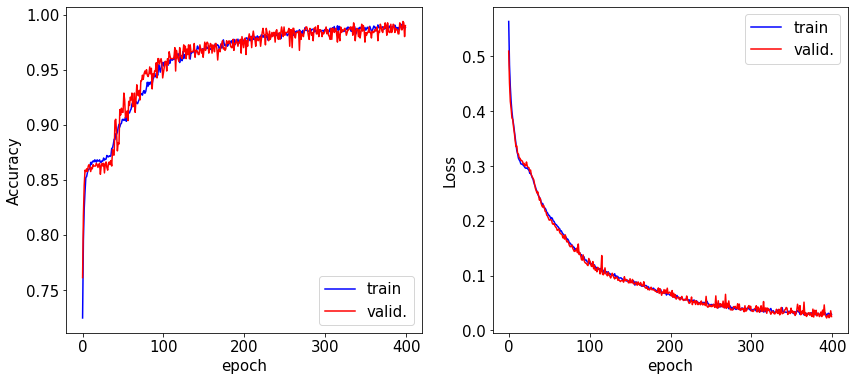

In [57]:
print('Max accuracy up to 40 epochs:', np.array(fit.history['val_accuracy'][:40]).max())
print('Min loss up to 40 epochs:', np.array(fit.history['val_loss'][:40]).min())

fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

As expected, with a smaller amount of shifted data, the training set is more representative of the validation set, and therefore the validation loss is lower and closer to the training one.

# P3 : Non-linear data

In [58]:
import matplotlib.cm as cm
# number of data
N=4000
# size of each sample
L=2
# box size
B=100

!mkdir DATA2


mkdir: impossibile creare la directory "DATA2": File già esistente


2 5 1
./DATA/data-for-DNN-2.dat
./DATA/labels-for-DNN-2.dat


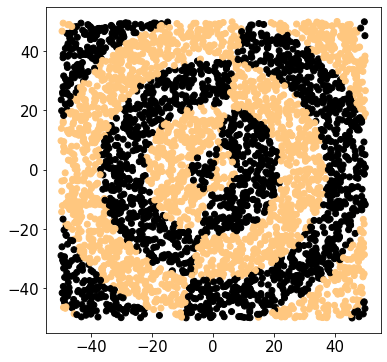

In [59]:
TYPE=2

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap=cm.copper)
plt.show

fn=filename("data",TYPE)
np.savetxt(fn,x)
print(fn)
fn=filename("labels",TYPE)
np.savetxt(fn,y,fmt="%d")
print(fn)


In [60]:
# Split training and test data
(x_train, y_train) = (x[0:N_train],y[0:N_train]) 
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))


Train: 3200 	 Validation: 800


In [61]:
#rescale variables
x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [62]:
def create_model(activation='relu',optimizer=keras.optimizers.Adam()):   #defined a function so it's easier to tune 
    model = Sequential()                                                 #activation and optimizer as parameters
    model.add(Dense(L,input_shape=(L,),activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,           #optimization method and cost function
                  metrics=['accuracy'])
    return model

model_DNN = create_model()
print(model_DNN.summary())

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_325 (Dense)           (None, 2)                 6         
                                                                 
 dense_326 (Dense)           (None, 20)                60        
                                                                 
 dense_327 (Dense)           (None, 20)                420       
                                                                 
 dense_328 (Dense)           (None, 20)                420       
                                                                 
 dropout_65 (Dropout)        (None, 20)                0         
                                                                 
 dense_329 (Dense)           (None, 1)                 21        
                                                                 
Total params: 927
Trainable params: 927
Non-trainable

Using a gridsearch we founded the best optimizer and the best activation function

In [63]:
# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=create_model, 
                        epochs=1, 
                        batch_size=50, 
                        verbose=1)

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# define parameter dictionary
param_grid = dict(optimizer=optimizer)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result_opt = grid.fit(x_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result_opt.best_score_, grid_result_opt.best_params_))
means = grid_result_opt.cv_results_['mean_test_score']
stds = grid_result_opt.cv_results_['std_test_score']
params = grid_result_opt.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/tmp/ipykernel_264103/2403557894.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_gridsearch = KerasClassifier(build_fn=create_model,


64/64 [==============================] - 0s 740us/step - loss: 0.6925 - accuracy: 0.5125
Best: 0.521563 using {'optimizer': 'RMSprop'}
0.491875 (0.016782) with: {'optimizer': 'SGD'}
0.521563 (0.011672) with: {'optimizer': 'RMSprop'}
0.511875 (0.028798) with: {'optimizer': 'Adagrad'}
0.489375 (0.020776) with: {'optimizer': 'Adadelta'}
0.508750 (0.008385) with: {'optimizer': 'Adam'}
0.518125 (0.018926) with: {'optimizer': 'Adamax'}
0.499063 (0.009073) with: {'optimizer': 'Nadam'}


In [64]:
model = create_model()
model.compile()
model_activation = KerasClassifier(build_fn=create_model, epochs=1, batch_size=50, verbose=1)


activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)

grid = GridSearchCV(estimator=model_activation, param_grid=param_grid, n_jobs=1, cv=3)
grid_result_act = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result_act.best_score_, grid_result_act.best_params_))
means = grid_result_act.cv_results_['mean_test_score']
stds = grid_result_act.cv_results_['std_test_score']
params = grid_result_act.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/tmp/ipykernel_264103/3280631067.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_activation = KerasClassifier(build_fn=create_model, epochs=1, batch_size=50, verbose=1)


64/64 [==============================] - 0s 721us/step - loss: 0.6938 - accuracy: 0.5156
Best: 0.524070 using {'activation': 'linear'}
0.499690 (0.006431) with: {'activation': 'softmax'}
0.501248 (0.006317) with: {'activation': 'softplus'}
0.522809 (0.008204) with: {'activation': 'softsign'}
0.519686 (0.008283) with: {'activation': 'relu'}
0.512811 (0.010632) with: {'activation': 'tanh'}
0.501248 (0.006317) with: {'activation': 'sigmoid'}
0.501248 (0.006317) with: {'activation': 'hard_sigmoid'}
0.524070 (0.017623) with: {'activation': 'linear'}


In [81]:
#We create the DNN with the parameters founded using gridsearch
def best_model(activation='linear',optimizer=keras.optimizers.RMSprop()):
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation=best_act))
    model.add(Dense(20,activation=best_act))
    model.add(Dense(20,activation=best_act))
    model.add(Dense(20,activation=best_act))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
    model.compile(loss='binary_crossentropy',
                  optimizer=best_opt,           #optimization method and cost function
                  metrics=['accuracy'])
    return model

best_nlmodel_DNN = best_model()

In [82]:
fit = best_nlmodel_DNN.fit(x_train, y_train,
               epochs = 2000, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/2000
64/64 - 1s - loss: 0.6928 - accuracy: 0.5200 - val_loss: 0.6935 - val_accuracy: 0.5100 - 737ms/epoch - 12ms/step
Epoch 2/2000
64/64 - 0s - loss: 0.6918 - accuracy: 0.5188 - val_loss: 0.6918 - val_accuracy: 0.5175 - 96ms/epoch - 1ms/step
Epoch 3/2000
64/64 - 0s - loss: 0.6918 - accuracy: 0.5216 - val_loss: 0.6946 - val_accuracy: 0.5213 - 79ms/epoch - 1ms/step
Epoch 4/2000
64/64 - 0s - loss: 0.6909 - accuracy: 0.5325 - val_loss: 0.6925 - val_accuracy: 0.5013 - 68ms/epoch - 1ms/step
Epoch 5/2000
64/64 - 0s - loss: 0.6907 - accuracy: 0.5266 - val_loss: 0.6942 - val_accuracy: 0.5250 - 72ms/epoch - 1ms/step
Epoch 6/2000
64/64 - 0s - loss: 0.6901 - accuracy: 0.5337 - val_loss: 0.6923 - val_accuracy: 0.5275 - 81ms/epoch - 1ms/step
Epoch 7/2000
64/64 - 0s - loss: 0.6898 - accuracy: 0.5288 - val_loss: 0.6951 - val_accuracy: 0.5213 - 62ms/epoch - 961us/step
Epoch 8/2000
64/64 - 0s - loss: 0.6899 - accuracy: 0.5331 - val_loss: 0.6915 - val_accuracy: 0.5200 - 66ms/epoch - 1ms/step
Epoc

Epoch 67/2000
64/64 - 0s - loss: 0.6826 - accuracy: 0.5528 - val_loss: 0.6851 - val_accuracy: 0.5113 - 64ms/epoch - 999us/step
Epoch 68/2000
64/64 - 0s - loss: 0.6821 - accuracy: 0.5447 - val_loss: 0.6840 - val_accuracy: 0.5238 - 85ms/epoch - 1ms/step
Epoch 69/2000
64/64 - 0s - loss: 0.6823 - accuracy: 0.5472 - val_loss: 0.6836 - val_accuracy: 0.5238 - 103ms/epoch - 2ms/step
Epoch 70/2000
64/64 - 0s - loss: 0.6818 - accuracy: 0.5628 - val_loss: 0.6833 - val_accuracy: 0.5225 - 110ms/epoch - 2ms/step
Epoch 71/2000
64/64 - 0s - loss: 0.6823 - accuracy: 0.5556 - val_loss: 0.6853 - val_accuracy: 0.5213 - 100ms/epoch - 2ms/step
Epoch 72/2000
64/64 - 0s - loss: 0.6819 - accuracy: 0.5572 - val_loss: 0.6835 - val_accuracy: 0.5213 - 79ms/epoch - 1ms/step
Epoch 73/2000
64/64 - 0s - loss: 0.6822 - accuracy: 0.5503 - val_loss: 0.6839 - val_accuracy: 0.5263 - 62ms/epoch - 968us/step
Epoch 74/2000
64/64 - 0s - loss: 0.6817 - accuracy: 0.5537 - val_loss: 0.6824 - val_accuracy: 0.5300 - 67ms/epoch - 1m

Epoch 132/2000
64/64 - 0s - loss: 0.6645 - accuracy: 0.6056 - val_loss: 0.6671 - val_accuracy: 0.5950 - 58ms/epoch - 903us/step
Epoch 133/2000
64/64 - 0s - loss: 0.6638 - accuracy: 0.6041 - val_loss: 0.6657 - val_accuracy: 0.5775 - 80ms/epoch - 1ms/step
Epoch 134/2000
64/64 - 0s - loss: 0.6630 - accuracy: 0.6091 - val_loss: 0.6652 - val_accuracy: 0.5950 - 62ms/epoch - 967us/step
Epoch 135/2000
64/64 - 0s - loss: 0.6611 - accuracy: 0.6069 - val_loss: 0.6623 - val_accuracy: 0.6050 - 64ms/epoch - 1ms/step
Epoch 136/2000
64/64 - 0s - loss: 0.6618 - accuracy: 0.6066 - val_loss: 0.6646 - val_accuracy: 0.5850 - 105ms/epoch - 2ms/step
Epoch 137/2000
64/64 - 0s - loss: 0.6615 - accuracy: 0.6087 - val_loss: 0.6612 - val_accuracy: 0.5950 - 126ms/epoch - 2ms/step
Epoch 138/2000
64/64 - 0s - loss: 0.6608 - accuracy: 0.6075 - val_loss: 0.6605 - val_accuracy: 0.6025 - 82ms/epoch - 1ms/step
Epoch 139/2000
64/64 - 0s - loss: 0.6601 - accuracy: 0.6116 - val_loss: 0.6646 - val_accuracy: 0.5650 - 64ms/epo

Epoch 197/2000
64/64 - 0s - loss: 0.5700 - accuracy: 0.6734 - val_loss: 0.5667 - val_accuracy: 0.6700 - 62ms/epoch - 969us/step
Epoch 198/2000
64/64 - 0s - loss: 0.5714 - accuracy: 0.6706 - val_loss: 0.5617 - val_accuracy: 0.6687 - 59ms/epoch - 928us/step
Epoch 199/2000
64/64 - 0s - loss: 0.5721 - accuracy: 0.6691 - val_loss: 0.5631 - val_accuracy: 0.6650 - 73ms/epoch - 1ms/step
Epoch 200/2000
64/64 - 0s - loss: 0.5715 - accuracy: 0.6691 - val_loss: 0.5594 - val_accuracy: 0.6800 - 61ms/epoch - 952us/step
Epoch 201/2000
64/64 - 0s - loss: 0.5706 - accuracy: 0.6666 - val_loss: 0.5582 - val_accuracy: 0.6750 - 67ms/epoch - 1ms/step
Epoch 202/2000
64/64 - 0s - loss: 0.5706 - accuracy: 0.6716 - val_loss: 0.5582 - val_accuracy: 0.6812 - 69ms/epoch - 1ms/step
Epoch 203/2000
64/64 - 0s - loss: 0.5698 - accuracy: 0.6703 - val_loss: 0.5608 - val_accuracy: 0.6587 - 71ms/epoch - 1ms/step
Epoch 204/2000
64/64 - 0s - loss: 0.5635 - accuracy: 0.6722 - val_loss: 0.5610 - val_accuracy: 0.6637 - 68ms/epo

Epoch 262/2000
64/64 - 0s - loss: 0.5323 - accuracy: 0.7078 - val_loss: 0.5222 - val_accuracy: 0.7212 - 74ms/epoch - 1ms/step
Epoch 263/2000
64/64 - 0s - loss: 0.5288 - accuracy: 0.7122 - val_loss: 0.5260 - val_accuracy: 0.7225 - 71ms/epoch - 1ms/step
Epoch 264/2000
64/64 - 0s - loss: 0.5338 - accuracy: 0.7100 - val_loss: 0.5231 - val_accuracy: 0.7125 - 75ms/epoch - 1ms/step
Epoch 265/2000
64/64 - 0s - loss: 0.5315 - accuracy: 0.7084 - val_loss: 0.5183 - val_accuracy: 0.7163 - 85ms/epoch - 1ms/step
Epoch 266/2000
64/64 - 0s - loss: 0.5285 - accuracy: 0.7119 - val_loss: 0.5195 - val_accuracy: 0.7113 - 75ms/epoch - 1ms/step
Epoch 267/2000
64/64 - 0s - loss: 0.5335 - accuracy: 0.7113 - val_loss: 0.5210 - val_accuracy: 0.7138 - 77ms/epoch - 1ms/step
Epoch 268/2000
64/64 - 0s - loss: 0.5306 - accuracy: 0.7097 - val_loss: 0.5205 - val_accuracy: 0.7163 - 71ms/epoch - 1ms/step
Epoch 269/2000
64/64 - 0s - loss: 0.5286 - accuracy: 0.7125 - val_loss: 0.5202 - val_accuracy: 0.7188 - 119ms/epoch - 

Epoch 327/2000
64/64 - 0s - loss: 0.5039 - accuracy: 0.7322 - val_loss: 0.4901 - val_accuracy: 0.7375 - 75ms/epoch - 1ms/step
Epoch 328/2000
64/64 - 0s - loss: 0.4985 - accuracy: 0.7306 - val_loss: 0.4889 - val_accuracy: 0.7362 - 71ms/epoch - 1ms/step
Epoch 329/2000
64/64 - 0s - loss: 0.4991 - accuracy: 0.7303 - val_loss: 0.4948 - val_accuracy: 0.7450 - 74ms/epoch - 1ms/step
Epoch 330/2000
64/64 - 0s - loss: 0.5022 - accuracy: 0.7278 - val_loss: 0.4907 - val_accuracy: 0.7375 - 73ms/epoch - 1ms/step
Epoch 331/2000
64/64 - 0s - loss: 0.5027 - accuracy: 0.7309 - val_loss: 0.4855 - val_accuracy: 0.7387 - 76ms/epoch - 1ms/step
Epoch 332/2000
64/64 - 0s - loss: 0.5012 - accuracy: 0.7312 - val_loss: 0.4891 - val_accuracy: 0.7375 - 69ms/epoch - 1ms/step
Epoch 333/2000
64/64 - 0s - loss: 0.4986 - accuracy: 0.7328 - val_loss: 0.4851 - val_accuracy: 0.7450 - 69ms/epoch - 1ms/step
Epoch 334/2000
64/64 - 0s - loss: 0.4949 - accuracy: 0.7297 - val_loss: 0.4857 - val_accuracy: 0.7450 - 76ms/epoch - 1

Epoch 392/2000
64/64 - 0s - loss: 0.4755 - accuracy: 0.7344 - val_loss: 0.4556 - val_accuracy: 0.7425 - 74ms/epoch - 1ms/step
Epoch 393/2000
64/64 - 0s - loss: 0.4709 - accuracy: 0.7372 - val_loss: 0.4559 - val_accuracy: 0.7425 - 64ms/epoch - 1ms/step
Epoch 394/2000
64/64 - 0s - loss: 0.4695 - accuracy: 0.7362 - val_loss: 0.4525 - val_accuracy: 0.7525 - 64ms/epoch - 996us/step
Epoch 395/2000
64/64 - 0s - loss: 0.4675 - accuracy: 0.7447 - val_loss: 0.4518 - val_accuracy: 0.7500 - 59ms/epoch - 929us/step
Epoch 396/2000
64/64 - 0s - loss: 0.4650 - accuracy: 0.7419 - val_loss: 0.4515 - val_accuracy: 0.7500 - 65ms/epoch - 1ms/step
Epoch 397/2000
64/64 - 0s - loss: 0.4689 - accuracy: 0.7378 - val_loss: 0.4535 - val_accuracy: 0.7475 - 63ms/epoch - 988us/step
Epoch 398/2000
64/64 - 0s - loss: 0.4674 - accuracy: 0.7400 - val_loss: 0.4513 - val_accuracy: 0.7475 - 67ms/epoch - 1ms/step
Epoch 399/2000
64/64 - 0s - loss: 0.4646 - accuracy: 0.7387 - val_loss: 0.4502 - val_accuracy: 0.7462 - 63ms/epo

Epoch 457/2000
64/64 - 0s - loss: 0.4458 - accuracy: 0.7500 - val_loss: 0.4284 - val_accuracy: 0.7538 - 70ms/epoch - 1ms/step
Epoch 458/2000
64/64 - 0s - loss: 0.4514 - accuracy: 0.7494 - val_loss: 0.4410 - val_accuracy: 0.7588 - 71ms/epoch - 1ms/step
Epoch 459/2000
64/64 - 0s - loss: 0.4484 - accuracy: 0.7538 - val_loss: 0.4312 - val_accuracy: 0.7575 - 75ms/epoch - 1ms/step
Epoch 460/2000
64/64 - 0s - loss: 0.4484 - accuracy: 0.7528 - val_loss: 0.4300 - val_accuracy: 0.7575 - 82ms/epoch - 1ms/step
Epoch 461/2000
64/64 - 0s - loss: 0.4464 - accuracy: 0.7541 - val_loss: 0.4366 - val_accuracy: 0.7700 - 78ms/epoch - 1ms/step
Epoch 462/2000
64/64 - 0s - loss: 0.4458 - accuracy: 0.7519 - val_loss: 0.4299 - val_accuracy: 0.7550 - 61ms/epoch - 947us/step
Epoch 463/2000
64/64 - 0s - loss: 0.4488 - accuracy: 0.7481 - val_loss: 0.4302 - val_accuracy: 0.7638 - 85ms/epoch - 1ms/step
Epoch 464/2000
64/64 - 0s - loss: 0.4420 - accuracy: 0.7572 - val_loss: 0.4262 - val_accuracy: 0.7613 - 70ms/epoch -

Epoch 522/2000
64/64 - 0s - loss: 0.4256 - accuracy: 0.7725 - val_loss: 0.4120 - val_accuracy: 0.7825 - 74ms/epoch - 1ms/step
Epoch 523/2000
64/64 - 0s - loss: 0.4303 - accuracy: 0.7684 - val_loss: 0.4087 - val_accuracy: 0.7763 - 73ms/epoch - 1ms/step
Epoch 524/2000
64/64 - 0s - loss: 0.4276 - accuracy: 0.7741 - val_loss: 0.4104 - val_accuracy: 0.7837 - 70ms/epoch - 1ms/step
Epoch 525/2000
64/64 - 0s - loss: 0.4282 - accuracy: 0.7653 - val_loss: 0.4114 - val_accuracy: 0.7763 - 77ms/epoch - 1ms/step
Epoch 526/2000
64/64 - 0s - loss: 0.4296 - accuracy: 0.7628 - val_loss: 0.4088 - val_accuracy: 0.7675 - 87ms/epoch - 1ms/step
Epoch 527/2000
64/64 - 0s - loss: 0.4320 - accuracy: 0.7725 - val_loss: 0.4101 - val_accuracy: 0.7713 - 70ms/epoch - 1ms/step
Epoch 528/2000
64/64 - 0s - loss: 0.4343 - accuracy: 0.7663 - val_loss: 0.4120 - val_accuracy: 0.7763 - 99ms/epoch - 2ms/step
Epoch 529/2000
64/64 - 0s - loss: 0.4295 - accuracy: 0.7625 - val_loss: 0.4115 - val_accuracy: 0.7663 - 86ms/epoch - 1

Epoch 587/2000
64/64 - 0s - loss: 0.4087 - accuracy: 0.7866 - val_loss: 0.3971 - val_accuracy: 0.7862 - 102ms/epoch - 2ms/step
Epoch 588/2000
64/64 - 0s - loss: 0.4135 - accuracy: 0.7825 - val_loss: 0.3938 - val_accuracy: 0.7987 - 74ms/epoch - 1ms/step
Epoch 589/2000
64/64 - 0s - loss: 0.4155 - accuracy: 0.7822 - val_loss: 0.3925 - val_accuracy: 0.7800 - 81ms/epoch - 1ms/step
Epoch 590/2000
64/64 - 0s - loss: 0.4115 - accuracy: 0.7834 - val_loss: 0.3961 - val_accuracy: 0.7975 - 89ms/epoch - 1ms/step
Epoch 591/2000
64/64 - 0s - loss: 0.4127 - accuracy: 0.7763 - val_loss: 0.3954 - val_accuracy: 0.7937 - 94ms/epoch - 1ms/step
Epoch 592/2000
64/64 - 0s - loss: 0.4072 - accuracy: 0.7872 - val_loss: 0.3965 - val_accuracy: 0.8037 - 85ms/epoch - 1ms/step
Epoch 593/2000
64/64 - 0s - loss: 0.4118 - accuracy: 0.7803 - val_loss: 0.3974 - val_accuracy: 0.7750 - 83ms/epoch - 1ms/step
Epoch 594/2000
64/64 - 0s - loss: 0.4121 - accuracy: 0.7828 - val_loss: 0.4029 - val_accuracy: 0.7950 - 88ms/epoch - 

Epoch 652/2000
64/64 - 0s - loss: 0.3957 - accuracy: 0.7891 - val_loss: 0.3885 - val_accuracy: 0.7925 - 70ms/epoch - 1ms/step
Epoch 653/2000
64/64 - 0s - loss: 0.3984 - accuracy: 0.7878 - val_loss: 0.3978 - val_accuracy: 0.7937 - 72ms/epoch - 1ms/step
Epoch 654/2000
64/64 - 0s - loss: 0.3983 - accuracy: 0.7906 - val_loss: 0.3897 - val_accuracy: 0.8000 - 72ms/epoch - 1ms/step
Epoch 655/2000
64/64 - 0s - loss: 0.3913 - accuracy: 0.7937 - val_loss: 0.3892 - val_accuracy: 0.8062 - 76ms/epoch - 1ms/step
Epoch 656/2000
64/64 - 0s - loss: 0.3957 - accuracy: 0.7841 - val_loss: 0.3886 - val_accuracy: 0.7812 - 73ms/epoch - 1ms/step
Epoch 657/2000
64/64 - 0s - loss: 0.3964 - accuracy: 0.7875 - val_loss: 0.3840 - val_accuracy: 0.7900 - 70ms/epoch - 1ms/step
Epoch 658/2000
64/64 - 0s - loss: 0.3965 - accuracy: 0.7891 - val_loss: 0.3831 - val_accuracy: 0.7975 - 74ms/epoch - 1ms/step
Epoch 659/2000
64/64 - 0s - loss: 0.4019 - accuracy: 0.7884 - val_loss: 0.3871 - val_accuracy: 0.8000 - 89ms/epoch - 1

Epoch 717/2000
64/64 - 0s - loss: 0.3769 - accuracy: 0.7962 - val_loss: 0.3671 - val_accuracy: 0.8000 - 70ms/epoch - 1ms/step
Epoch 718/2000
64/64 - 0s - loss: 0.3819 - accuracy: 0.7903 - val_loss: 0.3704 - val_accuracy: 0.8025 - 74ms/epoch - 1ms/step
Epoch 719/2000
64/64 - 0s - loss: 0.3829 - accuracy: 0.7947 - val_loss: 0.3697 - val_accuracy: 0.7975 - 71ms/epoch - 1ms/step
Epoch 720/2000
64/64 - 0s - loss: 0.3840 - accuracy: 0.7969 - val_loss: 0.3709 - val_accuracy: 0.8087 - 81ms/epoch - 1ms/step
Epoch 721/2000
64/64 - 0s - loss: 0.3873 - accuracy: 0.7984 - val_loss: 0.3675 - val_accuracy: 0.7912 - 82ms/epoch - 1ms/step
Epoch 722/2000
64/64 - 0s - loss: 0.3758 - accuracy: 0.8031 - val_loss: 0.3677 - val_accuracy: 0.8025 - 74ms/epoch - 1ms/step
Epoch 723/2000
64/64 - 0s - loss: 0.3830 - accuracy: 0.7991 - val_loss: 0.3716 - val_accuracy: 0.8037 - 73ms/epoch - 1ms/step
Epoch 724/2000
64/64 - 0s - loss: 0.3788 - accuracy: 0.7959 - val_loss: 0.3705 - val_accuracy: 0.8025 - 69ms/epoch - 1

Epoch 782/2000
64/64 - 0s - loss: 0.3560 - accuracy: 0.8112 - val_loss: 0.3544 - val_accuracy: 0.8238 - 101ms/epoch - 2ms/step
Epoch 783/2000
64/64 - 0s - loss: 0.3683 - accuracy: 0.8097 - val_loss: 0.3511 - val_accuracy: 0.8100 - 71ms/epoch - 1ms/step
Epoch 784/2000
64/64 - 0s - loss: 0.3616 - accuracy: 0.8131 - val_loss: 0.3609 - val_accuracy: 0.8200 - 82ms/epoch - 1ms/step
Epoch 785/2000
64/64 - 0s - loss: 0.3636 - accuracy: 0.8134 - val_loss: 0.3545 - val_accuracy: 0.8175 - 69ms/epoch - 1ms/step
Epoch 786/2000
64/64 - 0s - loss: 0.3691 - accuracy: 0.8069 - val_loss: 0.3583 - val_accuracy: 0.8150 - 77ms/epoch - 1ms/step
Epoch 787/2000
64/64 - 0s - loss: 0.3515 - accuracy: 0.8234 - val_loss: 0.3526 - val_accuracy: 0.7975 - 86ms/epoch - 1ms/step
Epoch 788/2000
64/64 - 0s - loss: 0.3640 - accuracy: 0.8109 - val_loss: 0.3604 - val_accuracy: 0.8050 - 81ms/epoch - 1ms/step
Epoch 789/2000
64/64 - 0s - loss: 0.3633 - accuracy: 0.8153 - val_loss: 0.3525 - val_accuracy: 0.8012 - 78ms/epoch - 

Epoch 847/2000
64/64 - 0s - loss: 0.3440 - accuracy: 0.8259 - val_loss: 0.3394 - val_accuracy: 0.8225 - 73ms/epoch - 1ms/step
Epoch 848/2000
64/64 - 0s - loss: 0.3496 - accuracy: 0.8313 - val_loss: 0.3428 - val_accuracy: 0.8288 - 70ms/epoch - 1ms/step
Epoch 849/2000
64/64 - 0s - loss: 0.3517 - accuracy: 0.8306 - val_loss: 0.3369 - val_accuracy: 0.8188 - 81ms/epoch - 1ms/step
Epoch 850/2000
64/64 - 0s - loss: 0.3422 - accuracy: 0.8306 - val_loss: 0.3417 - val_accuracy: 0.8163 - 79ms/epoch - 1ms/step
Epoch 851/2000
64/64 - 0s - loss: 0.3374 - accuracy: 0.8288 - val_loss: 0.3398 - val_accuracy: 0.8150 - 79ms/epoch - 1ms/step
Epoch 852/2000
64/64 - 0s - loss: 0.3489 - accuracy: 0.8319 - val_loss: 0.3371 - val_accuracy: 0.8225 - 70ms/epoch - 1ms/step
Epoch 853/2000
64/64 - 0s - loss: 0.3435 - accuracy: 0.8322 - val_loss: 0.3369 - val_accuracy: 0.8363 - 60ms/epoch - 941us/step
Epoch 854/2000
64/64 - 0s - loss: 0.3448 - accuracy: 0.8256 - val_loss: 0.3386 - val_accuracy: 0.8125 - 63ms/epoch -

Epoch 912/2000
64/64 - 0s - loss: 0.3230 - accuracy: 0.8453 - val_loss: 0.3294 - val_accuracy: 0.8263 - 113ms/epoch - 2ms/step
Epoch 913/2000
64/64 - 0s - loss: 0.3293 - accuracy: 0.8459 - val_loss: 0.3233 - val_accuracy: 0.8288 - 78ms/epoch - 1ms/step
Epoch 914/2000
64/64 - 0s - loss: 0.3333 - accuracy: 0.8388 - val_loss: 0.3217 - val_accuracy: 0.8288 - 72ms/epoch - 1ms/step
Epoch 915/2000
64/64 - 0s - loss: 0.3277 - accuracy: 0.8397 - val_loss: 0.3223 - val_accuracy: 0.8188 - 85ms/epoch - 1ms/step
Epoch 916/2000
64/64 - 0s - loss: 0.3237 - accuracy: 0.8494 - val_loss: 0.3244 - val_accuracy: 0.8363 - 73ms/epoch - 1ms/step
Epoch 917/2000
64/64 - 0s - loss: 0.3280 - accuracy: 0.8422 - val_loss: 0.3220 - val_accuracy: 0.8425 - 78ms/epoch - 1ms/step
Epoch 918/2000
64/64 - 0s - loss: 0.3311 - accuracy: 0.8428 - val_loss: 0.3198 - val_accuracy: 0.8300 - 76ms/epoch - 1ms/step
Epoch 919/2000
64/64 - 0s - loss: 0.3260 - accuracy: 0.8444 - val_loss: 0.3208 - val_accuracy: 0.8425 - 72ms/epoch - 

Epoch 977/2000
64/64 - 0s - loss: 0.3020 - accuracy: 0.8594 - val_loss: 0.2968 - val_accuracy: 0.8700 - 85ms/epoch - 1ms/step
Epoch 978/2000
64/64 - 0s - loss: 0.3077 - accuracy: 0.8597 - val_loss: 0.2973 - val_accuracy: 0.8400 - 74ms/epoch - 1ms/step
Epoch 979/2000
64/64 - 0s - loss: 0.3035 - accuracy: 0.8634 - val_loss: 0.2953 - val_accuracy: 0.8525 - 70ms/epoch - 1ms/step
Epoch 980/2000
64/64 - 0s - loss: 0.3038 - accuracy: 0.8600 - val_loss: 0.2907 - val_accuracy: 0.8500 - 73ms/epoch - 1ms/step
Epoch 981/2000
64/64 - 0s - loss: 0.3038 - accuracy: 0.8641 - val_loss: 0.2924 - val_accuracy: 0.8650 - 70ms/epoch - 1ms/step
Epoch 982/2000
64/64 - 0s - loss: 0.3049 - accuracy: 0.8662 - val_loss: 0.2942 - val_accuracy: 0.8550 - 74ms/epoch - 1ms/step
Epoch 983/2000
64/64 - 0s - loss: 0.3076 - accuracy: 0.8597 - val_loss: 0.2922 - val_accuracy: 0.8737 - 70ms/epoch - 1ms/step
Epoch 984/2000
64/64 - 0s - loss: 0.3141 - accuracy: 0.8591 - val_loss: 0.2913 - val_accuracy: 0.8512 - 78ms/epoch - 1

Epoch 1042/2000
64/64 - 0s - loss: 0.2784 - accuracy: 0.8806 - val_loss: 0.2705 - val_accuracy: 0.8750 - 88ms/epoch - 1ms/step
Epoch 1043/2000
64/64 - 0s - loss: 0.2795 - accuracy: 0.8850 - val_loss: 0.2707 - val_accuracy: 0.8737 - 83ms/epoch - 1ms/step
Epoch 1044/2000
64/64 - 0s - loss: 0.2812 - accuracy: 0.8803 - val_loss: 0.2656 - val_accuracy: 0.8888 - 86ms/epoch - 1ms/step
Epoch 1045/2000
64/64 - 0s - loss: 0.2809 - accuracy: 0.8806 - val_loss: 0.2673 - val_accuracy: 0.8700 - 65ms/epoch - 1ms/step
Epoch 1046/2000
64/64 - 0s - loss: 0.2813 - accuracy: 0.8816 - val_loss: 0.2672 - val_accuracy: 0.8838 - 69ms/epoch - 1ms/step
Epoch 1047/2000
64/64 - 0s - loss: 0.2803 - accuracy: 0.8847 - val_loss: 0.2642 - val_accuracy: 0.8700 - 70ms/epoch - 1ms/step
Epoch 1048/2000
64/64 - 0s - loss: 0.2840 - accuracy: 0.8759 - val_loss: 0.2663 - val_accuracy: 0.8863 - 64ms/epoch - 1ms/step
Epoch 1049/2000
64/64 - 0s - loss: 0.2730 - accuracy: 0.8850 - val_loss: 0.2620 - val_accuracy: 0.8975 - 67ms/e

Epoch 1107/2000
64/64 - 0s - loss: 0.2523 - accuracy: 0.8953 - val_loss: 0.2500 - val_accuracy: 0.8938 - 75ms/epoch - 1ms/step
Epoch 1108/2000
64/64 - 0s - loss: 0.2693 - accuracy: 0.8903 - val_loss: 0.2591 - val_accuracy: 0.8925 - 72ms/epoch - 1ms/step
Epoch 1109/2000
64/64 - 0s - loss: 0.2621 - accuracy: 0.8891 - val_loss: 0.2488 - val_accuracy: 0.9013 - 74ms/epoch - 1ms/step
Epoch 1110/2000
64/64 - 0s - loss: 0.2621 - accuracy: 0.8884 - val_loss: 0.2552 - val_accuracy: 0.8938 - 75ms/epoch - 1ms/step
Epoch 1111/2000
64/64 - 0s - loss: 0.2598 - accuracy: 0.8919 - val_loss: 0.2483 - val_accuracy: 0.9038 - 71ms/epoch - 1ms/step
Epoch 1112/2000
64/64 - 0s - loss: 0.2611 - accuracy: 0.8938 - val_loss: 0.2466 - val_accuracy: 0.8975 - 96ms/epoch - 1ms/step
Epoch 1113/2000
64/64 - 0s - loss: 0.2579 - accuracy: 0.8947 - val_loss: 0.2485 - val_accuracy: 0.8875 - 70ms/epoch - 1ms/step
Epoch 1114/2000
64/64 - 0s - loss: 0.2591 - accuracy: 0.8963 - val_loss: 0.2559 - val_accuracy: 0.8975 - 61ms/e

Epoch 1172/2000
64/64 - 0s - loss: 0.2554 - accuracy: 0.9003 - val_loss: 0.2310 - val_accuracy: 0.9000 - 63ms/epoch - 989us/step
Epoch 1173/2000
64/64 - 0s - loss: 0.2440 - accuracy: 0.8988 - val_loss: 0.2317 - val_accuracy: 0.9100 - 70ms/epoch - 1ms/step
Epoch 1174/2000
64/64 - 0s - loss: 0.2460 - accuracy: 0.9031 - val_loss: 0.2346 - val_accuracy: 0.9112 - 77ms/epoch - 1ms/step
Epoch 1175/2000
64/64 - 0s - loss: 0.2504 - accuracy: 0.9047 - val_loss: 0.2344 - val_accuracy: 0.9125 - 72ms/epoch - 1ms/step
Epoch 1176/2000
64/64 - 0s - loss: 0.2386 - accuracy: 0.9028 - val_loss: 0.2351 - val_accuracy: 0.9062 - 74ms/epoch - 1ms/step
Epoch 1177/2000
64/64 - 0s - loss: 0.2452 - accuracy: 0.8988 - val_loss: 0.2395 - val_accuracy: 0.9125 - 72ms/epoch - 1ms/step
Epoch 1178/2000
64/64 - 0s - loss: 0.2466 - accuracy: 0.9038 - val_loss: 0.2293 - val_accuracy: 0.9100 - 66ms/epoch - 1ms/step
Epoch 1179/2000
64/64 - 0s - loss: 0.2535 - accuracy: 0.8969 - val_loss: 0.2325 - val_accuracy: 0.9062 - 70ms

Epoch 1237/2000
64/64 - 0s - loss: 0.2322 - accuracy: 0.9122 - val_loss: 0.2156 - val_accuracy: 0.9287 - 71ms/epoch - 1ms/step
Epoch 1238/2000
64/64 - 0s - loss: 0.2349 - accuracy: 0.9100 - val_loss: 0.2170 - val_accuracy: 0.9225 - 83ms/epoch - 1ms/step
Epoch 1239/2000
64/64 - 0s - loss: 0.2229 - accuracy: 0.9159 - val_loss: 0.2221 - val_accuracy: 0.9075 - 76ms/epoch - 1ms/step
Epoch 1240/2000
64/64 - 0s - loss: 0.2382 - accuracy: 0.9087 - val_loss: 0.2228 - val_accuracy: 0.9112 - 75ms/epoch - 1ms/step
Epoch 1241/2000
64/64 - 0s - loss: 0.2274 - accuracy: 0.9081 - val_loss: 0.2179 - val_accuracy: 0.9225 - 76ms/epoch - 1ms/step
Epoch 1242/2000
64/64 - 0s - loss: 0.2307 - accuracy: 0.9137 - val_loss: 0.2218 - val_accuracy: 0.9225 - 77ms/epoch - 1ms/step
Epoch 1243/2000
64/64 - 0s - loss: 0.2296 - accuracy: 0.9122 - val_loss: 0.2178 - val_accuracy: 0.9200 - 76ms/epoch - 1ms/step
Epoch 1244/2000
64/64 - 0s - loss: 0.2281 - accuracy: 0.9119 - val_loss: 0.2176 - val_accuracy: 0.9162 - 74ms/e

Epoch 1302/2000
64/64 - 0s - loss: 0.2222 - accuracy: 0.9137 - val_loss: 0.2147 - val_accuracy: 0.9162 - 75ms/epoch - 1ms/step
Epoch 1303/2000
64/64 - 0s - loss: 0.2204 - accuracy: 0.9137 - val_loss: 0.2100 - val_accuracy: 0.9225 - 73ms/epoch - 1ms/step
Epoch 1304/2000
64/64 - 0s - loss: 0.2200 - accuracy: 0.9194 - val_loss: 0.2066 - val_accuracy: 0.9312 - 78ms/epoch - 1ms/step
Epoch 1305/2000
64/64 - 0s - loss: 0.2190 - accuracy: 0.9166 - val_loss: 0.2127 - val_accuracy: 0.9212 - 77ms/epoch - 1ms/step
Epoch 1306/2000
64/64 - 0s - loss: 0.2290 - accuracy: 0.9125 - val_loss: 0.2143 - val_accuracy: 0.9212 - 98ms/epoch - 2ms/step
Epoch 1307/2000
64/64 - 0s - loss: 0.2238 - accuracy: 0.9134 - val_loss: 0.2046 - val_accuracy: 0.9287 - 75ms/epoch - 1ms/step
Epoch 1308/2000
64/64 - 0s - loss: 0.2279 - accuracy: 0.9084 - val_loss: 0.2049 - val_accuracy: 0.9287 - 56ms/epoch - 870us/step
Epoch 1309/2000
64/64 - 0s - loss: 0.2234 - accuracy: 0.9153 - val_loss: 0.2109 - val_accuracy: 0.9200 - 56ms

Epoch 1367/2000
64/64 - 0s - loss: 0.2086 - accuracy: 0.9234 - val_loss: 0.2021 - val_accuracy: 0.9312 - 74ms/epoch - 1ms/step
Epoch 1368/2000
64/64 - 0s - loss: 0.2116 - accuracy: 0.9209 - val_loss: 0.1951 - val_accuracy: 0.9325 - 71ms/epoch - 1ms/step
Epoch 1369/2000
64/64 - 0s - loss: 0.2183 - accuracy: 0.9172 - val_loss: 0.2010 - val_accuracy: 0.9362 - 101ms/epoch - 2ms/step
Epoch 1370/2000
64/64 - 0s - loss: 0.2026 - accuracy: 0.9225 - val_loss: 0.1978 - val_accuracy: 0.9400 - 58ms/epoch - 910us/step
Epoch 1371/2000
64/64 - 0s - loss: 0.2134 - accuracy: 0.9184 - val_loss: 0.1959 - val_accuracy: 0.9337 - 62ms/epoch - 974us/step
Epoch 1372/2000
64/64 - 0s - loss: 0.2096 - accuracy: 0.9234 - val_loss: 0.2003 - val_accuracy: 0.9262 - 58ms/epoch - 901us/step
Epoch 1373/2000
64/64 - 0s - loss: 0.2097 - accuracy: 0.9194 - val_loss: 0.1974 - val_accuracy: 0.9413 - 61ms/epoch - 955us/step
Epoch 1374/2000
64/64 - 0s - loss: 0.2210 - accuracy: 0.9203 - val_loss: 0.1965 - val_accuracy: 0.9275

Epoch 1432/2000
64/64 - 0s - loss: 0.1973 - accuracy: 0.9275 - val_loss: 0.1839 - val_accuracy: 0.9350 - 83ms/epoch - 1ms/step
Epoch 1433/2000
64/64 - 0s - loss: 0.1922 - accuracy: 0.9312 - val_loss: 0.1904 - val_accuracy: 0.9400 - 65ms/epoch - 1ms/step
Epoch 1434/2000
64/64 - 0s - loss: 0.1996 - accuracy: 0.9262 - val_loss: 0.1857 - val_accuracy: 0.9325 - 62ms/epoch - 971us/step
Epoch 1435/2000
64/64 - 0s - loss: 0.2010 - accuracy: 0.9316 - val_loss: 0.1942 - val_accuracy: 0.9325 - 61ms/epoch - 946us/step
Epoch 1436/2000
64/64 - 0s - loss: 0.2093 - accuracy: 0.9216 - val_loss: 0.1872 - val_accuracy: 0.9375 - 70ms/epoch - 1ms/step
Epoch 1437/2000
64/64 - 0s - loss: 0.2041 - accuracy: 0.9262 - val_loss: 0.1910 - val_accuracy: 0.9237 - 74ms/epoch - 1ms/step
Epoch 1438/2000
64/64 - 0s - loss: 0.1988 - accuracy: 0.9303 - val_loss: 0.1887 - val_accuracy: 0.9375 - 76ms/epoch - 1ms/step
Epoch 1439/2000
64/64 - 0s - loss: 0.1884 - accuracy: 0.9334 - val_loss: 0.1883 - val_accuracy: 0.9362 - 75

Epoch 1497/2000
64/64 - 0s - loss: 0.1809 - accuracy: 0.9350 - val_loss: 0.1754 - val_accuracy: 0.9413 - 82ms/epoch - 1ms/step
Epoch 1498/2000
64/64 - 0s - loss: 0.1829 - accuracy: 0.9344 - val_loss: 0.1769 - val_accuracy: 0.9375 - 86ms/epoch - 1ms/step
Epoch 1499/2000
64/64 - 0s - loss: 0.1805 - accuracy: 0.9316 - val_loss: 0.1682 - val_accuracy: 0.9463 - 67ms/epoch - 1ms/step
Epoch 1500/2000
64/64 - 0s - loss: 0.1905 - accuracy: 0.9316 - val_loss: 0.1766 - val_accuracy: 0.9425 - 100ms/epoch - 2ms/step
Epoch 1501/2000
64/64 - 0s - loss: 0.1848 - accuracy: 0.9359 - val_loss: 0.1782 - val_accuracy: 0.9425 - 65ms/epoch - 1ms/step
Epoch 1502/2000
64/64 - 0s - loss: 0.1821 - accuracy: 0.9353 - val_loss: 0.1763 - val_accuracy: 0.9463 - 99ms/epoch - 2ms/step
Epoch 1503/2000
64/64 - 0s - loss: 0.1812 - accuracy: 0.9381 - val_loss: 0.1786 - val_accuracy: 0.9463 - 67ms/epoch - 1ms/step
Epoch 1504/2000
64/64 - 0s - loss: 0.1719 - accuracy: 0.9409 - val_loss: 0.1774 - val_accuracy: 0.9475 - 84ms/

Epoch 1562/2000
64/64 - 0s - loss: 0.1771 - accuracy: 0.9384 - val_loss: 0.1712 - val_accuracy: 0.9463 - 72ms/epoch - 1ms/step
Epoch 1563/2000
64/64 - 0s - loss: 0.1688 - accuracy: 0.9391 - val_loss: 0.1660 - val_accuracy: 0.9500 - 67ms/epoch - 1ms/step
Epoch 1564/2000
64/64 - 0s - loss: 0.1810 - accuracy: 0.9372 - val_loss: 0.1634 - val_accuracy: 0.9450 - 67ms/epoch - 1ms/step
Epoch 1565/2000
64/64 - 0s - loss: 0.1642 - accuracy: 0.9406 - val_loss: 0.1743 - val_accuracy: 0.9500 - 62ms/epoch - 962us/step
Epoch 1566/2000
64/64 - 0s - loss: 0.1718 - accuracy: 0.9403 - val_loss: 0.1707 - val_accuracy: 0.9513 - 65ms/epoch - 1ms/step
Epoch 1567/2000
64/64 - 0s - loss: 0.1737 - accuracy: 0.9391 - val_loss: 0.1654 - val_accuracy: 0.9525 - 61ms/epoch - 961us/step
Epoch 1568/2000
64/64 - 0s - loss: 0.1714 - accuracy: 0.9397 - val_loss: 0.1665 - val_accuracy: 0.9413 - 77ms/epoch - 1ms/step
Epoch 1569/2000
64/64 - 0s - loss: 0.1766 - accuracy: 0.9372 - val_loss: 0.1713 - val_accuracy: 0.9425 - 64

Epoch 1627/2000
64/64 - 0s - loss: 0.1634 - accuracy: 0.9453 - val_loss: 0.1585 - val_accuracy: 0.9500 - 74ms/epoch - 1ms/step
Epoch 1628/2000
64/64 - 0s - loss: 0.1723 - accuracy: 0.9372 - val_loss: 0.1626 - val_accuracy: 0.9513 - 73ms/epoch - 1ms/step
Epoch 1629/2000
64/64 - 0s - loss: 0.1659 - accuracy: 0.9397 - val_loss: 0.1626 - val_accuracy: 0.9525 - 94ms/epoch - 1ms/step
Epoch 1630/2000
64/64 - 0s - loss: 0.1676 - accuracy: 0.9378 - val_loss: 0.1631 - val_accuracy: 0.9475 - 95ms/epoch - 1ms/step
Epoch 1631/2000
64/64 - 0s - loss: 0.1652 - accuracy: 0.9422 - val_loss: 0.1611 - val_accuracy: 0.9513 - 64ms/epoch - 1ms/step
Epoch 1632/2000
64/64 - 0s - loss: 0.1639 - accuracy: 0.9434 - val_loss: 0.1526 - val_accuracy: 0.9625 - 80ms/epoch - 1ms/step
Epoch 1633/2000
64/64 - 0s - loss: 0.1643 - accuracy: 0.9438 - val_loss: 0.1609 - val_accuracy: 0.9488 - 79ms/epoch - 1ms/step
Epoch 1634/2000
64/64 - 0s - loss: 0.1676 - accuracy: 0.9406 - val_loss: 0.1604 - val_accuracy: 0.9488 - 81ms/e

Epoch 1692/2000
64/64 - 0s - loss: 0.1538 - accuracy: 0.9503 - val_loss: 0.1630 - val_accuracy: 0.9450 - 76ms/epoch - 1ms/step
Epoch 1693/2000
64/64 - 0s - loss: 0.1608 - accuracy: 0.9431 - val_loss: 0.1605 - val_accuracy: 0.9538 - 73ms/epoch - 1ms/step
Epoch 1694/2000
64/64 - 0s - loss: 0.1624 - accuracy: 0.9444 - val_loss: 0.1568 - val_accuracy: 0.9575 - 78ms/epoch - 1ms/step
Epoch 1695/2000
64/64 - 0s - loss: 0.1479 - accuracy: 0.9497 - val_loss: 0.1553 - val_accuracy: 0.9538 - 74ms/epoch - 1ms/step
Epoch 1696/2000
64/64 - 0s - loss: 0.1558 - accuracy: 0.9472 - val_loss: 0.1573 - val_accuracy: 0.9550 - 72ms/epoch - 1ms/step
Epoch 1697/2000
64/64 - 0s - loss: 0.1538 - accuracy: 0.9522 - val_loss: 0.1544 - val_accuracy: 0.9513 - 77ms/epoch - 1ms/step
Epoch 1698/2000
64/64 - 0s - loss: 0.1574 - accuracy: 0.9444 - val_loss: 0.1587 - val_accuracy: 0.9513 - 75ms/epoch - 1ms/step
Epoch 1699/2000
64/64 - 0s - loss: 0.1576 - accuracy: 0.9494 - val_loss: 0.1555 - val_accuracy: 0.9538 - 71ms/e

Epoch 1757/2000
64/64 - 0s - loss: 0.1437 - accuracy: 0.9528 - val_loss: 0.1503 - val_accuracy: 0.9525 - 81ms/epoch - 1ms/step
Epoch 1758/2000
64/64 - 0s - loss: 0.1511 - accuracy: 0.9513 - val_loss: 0.1599 - val_accuracy: 0.9488 - 76ms/epoch - 1ms/step
Epoch 1759/2000
64/64 - 0s - loss: 0.1418 - accuracy: 0.9547 - val_loss: 0.1470 - val_accuracy: 0.9525 - 74ms/epoch - 1ms/step
Epoch 1760/2000
64/64 - 0s - loss: 0.1478 - accuracy: 0.9509 - val_loss: 0.1430 - val_accuracy: 0.9563 - 81ms/epoch - 1ms/step
Epoch 1761/2000
64/64 - 0s - loss: 0.1495 - accuracy: 0.9475 - val_loss: 0.1537 - val_accuracy: 0.9463 - 76ms/epoch - 1ms/step
Epoch 1762/2000
64/64 - 0s - loss: 0.1471 - accuracy: 0.9484 - val_loss: 0.1575 - val_accuracy: 0.9388 - 57ms/epoch - 893us/step
Epoch 1763/2000
64/64 - 0s - loss: 0.1532 - accuracy: 0.9453 - val_loss: 0.1565 - val_accuracy: 0.9425 - 56ms/epoch - 869us/step
Epoch 1764/2000
64/64 - 0s - loss: 0.1488 - accuracy: 0.9503 - val_loss: 0.1474 - val_accuracy: 0.9513 - 57

Epoch 1822/2000
64/64 - 0s - loss: 0.1445 - accuracy: 0.9519 - val_loss: 0.1466 - val_accuracy: 0.9475 - 77ms/epoch - 1ms/step
Epoch 1823/2000
64/64 - 0s - loss: 0.1541 - accuracy: 0.9450 - val_loss: 0.1444 - val_accuracy: 0.9525 - 109ms/epoch - 2ms/step
Epoch 1824/2000
64/64 - 0s - loss: 0.1454 - accuracy: 0.9553 - val_loss: 0.1455 - val_accuracy: 0.9538 - 82ms/epoch - 1ms/step
Epoch 1825/2000
64/64 - 0s - loss: 0.1449 - accuracy: 0.9538 - val_loss: 0.1448 - val_accuracy: 0.9500 - 81ms/epoch - 1ms/step
Epoch 1826/2000
64/64 - 0s - loss: 0.1367 - accuracy: 0.9534 - val_loss: 0.1435 - val_accuracy: 0.9525 - 101ms/epoch - 2ms/step
Epoch 1827/2000
64/64 - 0s - loss: 0.1441 - accuracy: 0.9534 - val_loss: 0.1438 - val_accuracy: 0.9525 - 84ms/epoch - 1ms/step
Epoch 1828/2000
64/64 - 0s - loss: 0.1548 - accuracy: 0.9469 - val_loss: 0.1476 - val_accuracy: 0.9550 - 91ms/epoch - 1ms/step
Epoch 1829/2000
64/64 - 0s - loss: 0.1459 - accuracy: 0.9472 - val_loss: 0.1435 - val_accuracy: 0.9525 - 69ms

Epoch 1887/2000
64/64 - 0s - loss: 0.1423 - accuracy: 0.9503 - val_loss: 0.1403 - val_accuracy: 0.9513 - 80ms/epoch - 1ms/step
Epoch 1888/2000
64/64 - 0s - loss: 0.1353 - accuracy: 0.9538 - val_loss: 0.1499 - val_accuracy: 0.9450 - 87ms/epoch - 1ms/step
Epoch 1889/2000
64/64 - 0s - loss: 0.1381 - accuracy: 0.9547 - val_loss: 0.1387 - val_accuracy: 0.9538 - 84ms/epoch - 1ms/step
Epoch 1890/2000
64/64 - 0s - loss: 0.1399 - accuracy: 0.9513 - val_loss: 0.1411 - val_accuracy: 0.9525 - 85ms/epoch - 1ms/step
Epoch 1891/2000
64/64 - 0s - loss: 0.1348 - accuracy: 0.9581 - val_loss: 0.1428 - val_accuracy: 0.9513 - 70ms/epoch - 1ms/step
Epoch 1892/2000
64/64 - 0s - loss: 0.1490 - accuracy: 0.9469 - val_loss: 0.1414 - val_accuracy: 0.9563 - 74ms/epoch - 1ms/step
Epoch 1893/2000
64/64 - 0s - loss: 0.1435 - accuracy: 0.9444 - val_loss: 0.1490 - val_accuracy: 0.9488 - 68ms/epoch - 1ms/step
Epoch 1894/2000
64/64 - 0s - loss: 0.1440 - accuracy: 0.9525 - val_loss: 0.1479 - val_accuracy: 0.9500 - 71ms/e

Epoch 1952/2000
64/64 - 0s - loss: 0.1383 - accuracy: 0.9553 - val_loss: 0.1425 - val_accuracy: 0.9525 - 89ms/epoch - 1ms/step
Epoch 1953/2000
64/64 - 0s - loss: 0.1277 - accuracy: 0.9575 - val_loss: 0.1450 - val_accuracy: 0.9475 - 88ms/epoch - 1ms/step
Epoch 1954/2000
64/64 - 0s - loss: 0.1442 - accuracy: 0.9509 - val_loss: 0.1515 - val_accuracy: 0.9463 - 83ms/epoch - 1ms/step
Epoch 1955/2000
64/64 - 0s - loss: 0.1301 - accuracy: 0.9534 - val_loss: 0.1396 - val_accuracy: 0.9588 - 106ms/epoch - 2ms/step
Epoch 1956/2000
64/64 - 0s - loss: 0.1282 - accuracy: 0.9594 - val_loss: 0.1424 - val_accuracy: 0.9538 - 96ms/epoch - 1ms/step
Epoch 1957/2000
64/64 - 0s - loss: 0.1319 - accuracy: 0.9550 - val_loss: 0.1434 - val_accuracy: 0.9525 - 77ms/epoch - 1ms/step
Epoch 1958/2000
64/64 - 0s - loss: 0.1322 - accuracy: 0.9566 - val_loss: 0.1452 - val_accuracy: 0.9563 - 78ms/epoch - 1ms/step
Epoch 1959/2000
64/64 - 0s - loss: 0.1498 - accuracy: 0.9494 - val_loss: 0.1456 - val_accuracy: 0.9538 - 68ms/

Max accuracy up to 40 epochs: 0.5550000071525574
Min loss up to 40 epochs: 0.6851635575294495


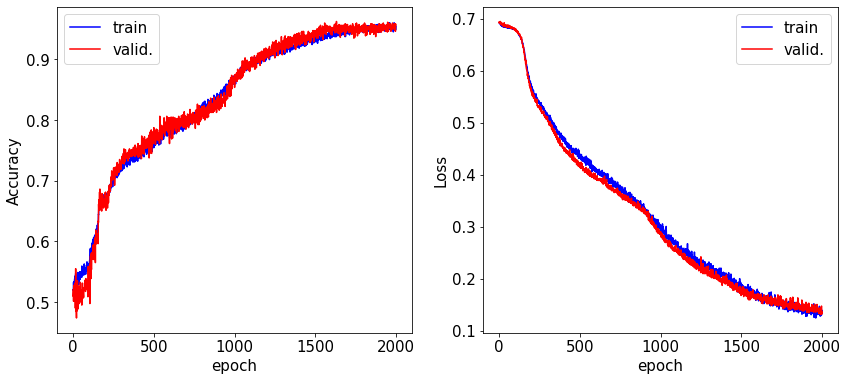

In [83]:
print('Max accuracy up to 40 epochs:', np.array(fit.history['val_accuracy'][:40]).max())
print('Min loss up to 40 epochs:', np.array(fit.history['val_loss'][:40]).min())

fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

For the non-linear data, we had to use a larger number of epochs in order to reach a convergence in the loss (we fixed epochs=2000).    
Non-linear functions are in general more complex and contain more intricate patterns compared to linear functions, so the network requires more epochs to learn this more complex representation and model the non-linear function. 